# Much ado about clustering

Clustering is a powerful unsupervised machine learning technique that groups similar data points based on their attributes, unveiling hidden patterns and structures within datasets.  
When done right, clustering can offer insights into customer behaviors, document categorization, and numerous other applications, making it an incredibly cool and valuable tool for data-driven decision-making.  <br>  
However, clustering can also be a source of frustration, primarily due to the challenge of determining the optimal number of clusters, the sensitivity to initial conditions in some algorithms,  and the difficulty of validating results, especially when ground truth labels are unavailable. This duality of intrigue and challenge is what makes clustering a fundamental and fascinating area of study in data science.

### [Sklearn clustering API](https://scikit-learn.org/stable/modules/clustering.html)

#### Each row represents a 2D dataset, each column is a clustering algorithm



<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" alt="Drawing" style="width: 1000px;"/>

# Part I : Basics of clustering


### Lets start with 2D data

- Assume you asked people their weight and height , but nothing else
- You want to find out whether there are different groups of people (males, females, babies, athletes, people with medical conditions, etc.)

In [1]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#Importing the Libraries
#import sys, warnings
import numpy as np
import matplotlib.pyplot as plt

random_state = 42
np.random.seed(random_state)

In [97]:
# Generate data for the 3 groups

#  Weight, Height
x1 = np.random.normal(80, 7, size=100) 
y1 = np.random.normal(183, 7, size=100) 

x2 = np.random.normal(60, 5, size=75)
y2 = np.random.normal(150, 6, size=75)

x3 = np.ceil( np.abs(np.random.normal(6, 15, size=50)) )
y3 = np.random.normal(80, 15, size=50) + 5

x4 = np.random.normal(37, 5, size=50) #*np.random.normal(1, 5, size=50) 
y4 = np.random.normal(20, .6, size=50) *x4/10


# Combine x and y data for both groups
# reshape into 2D arrays
x = np.concatenate((x1, x2, x3, x4)).reshape(-1,1)
y = np.concatenate((y1, y2, y3, y4)).reshape(-1,1)

# Stack the data
data = np.hstack((x, y))



Shape of data : (275, 2)


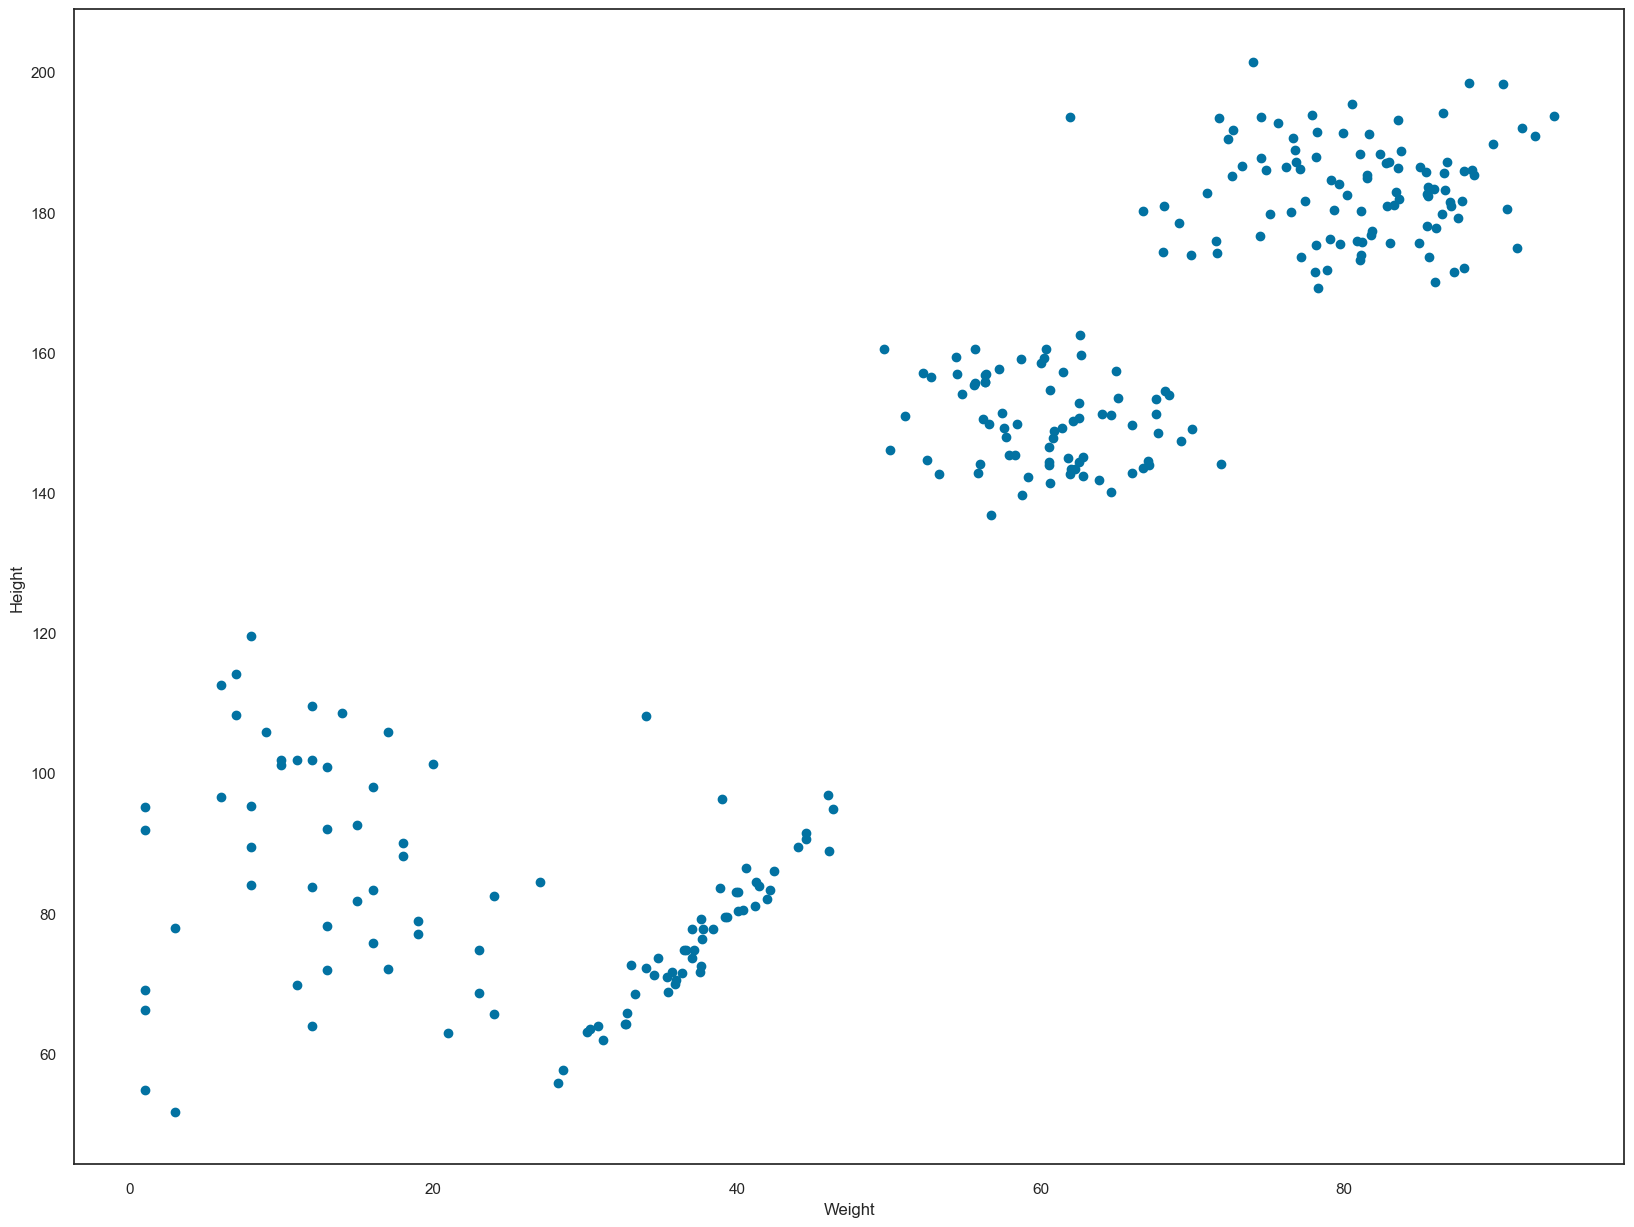

In [98]:
print(f'Shape of data : {data.shape}')
plt.scatter(x, y)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


### Lets try some clustering: 


#### Centroid based methods
##### [**K-means Clustering**](https://scikit-learn.org/stable/modules/clustering.html#k-means): 
  An iterative method for grouping similar data points. It assigns points to the nearest of `k` centroids. This process repeats until clusters stabilize. It's computationally simple but can vary based on initial centroids.



<center><img src="https://dashee87.github.io/images/kmeans.gif" width="750" align="center">

In [99]:
from sklearn.cluster import KMeans

In [100]:
km_clust = KMeans(n_clusters=3)

km_clust.fit(data)

km_labels =  km_clust.labels_



- The `ìnertia` attribute will return the sum of squared distances of samples to their closest cluster center, 

In [101]:
km_clust.inertia_

53753.5092500007

**Choosing the Number of Clusters (K)**: <br>  
  The optimal `k` is often unclear. There are metrics that can help you decide:
  
1.  **Inertia** (sum of squared distances to centroids) <br>
2.  **Distortion** (average squared distance to centroids)  
  
`Inertia` penalizes larger clusters, while `distortion` remains stable with more points.

In [102]:
inertias = []
distortions = []

for k in range(2, 10):
    inertia = KMeans(n_clusters=k).fit(data).inertia_
    distortion = inertia / k
    inertias.append(inertia)
    distortions.append(distortion)



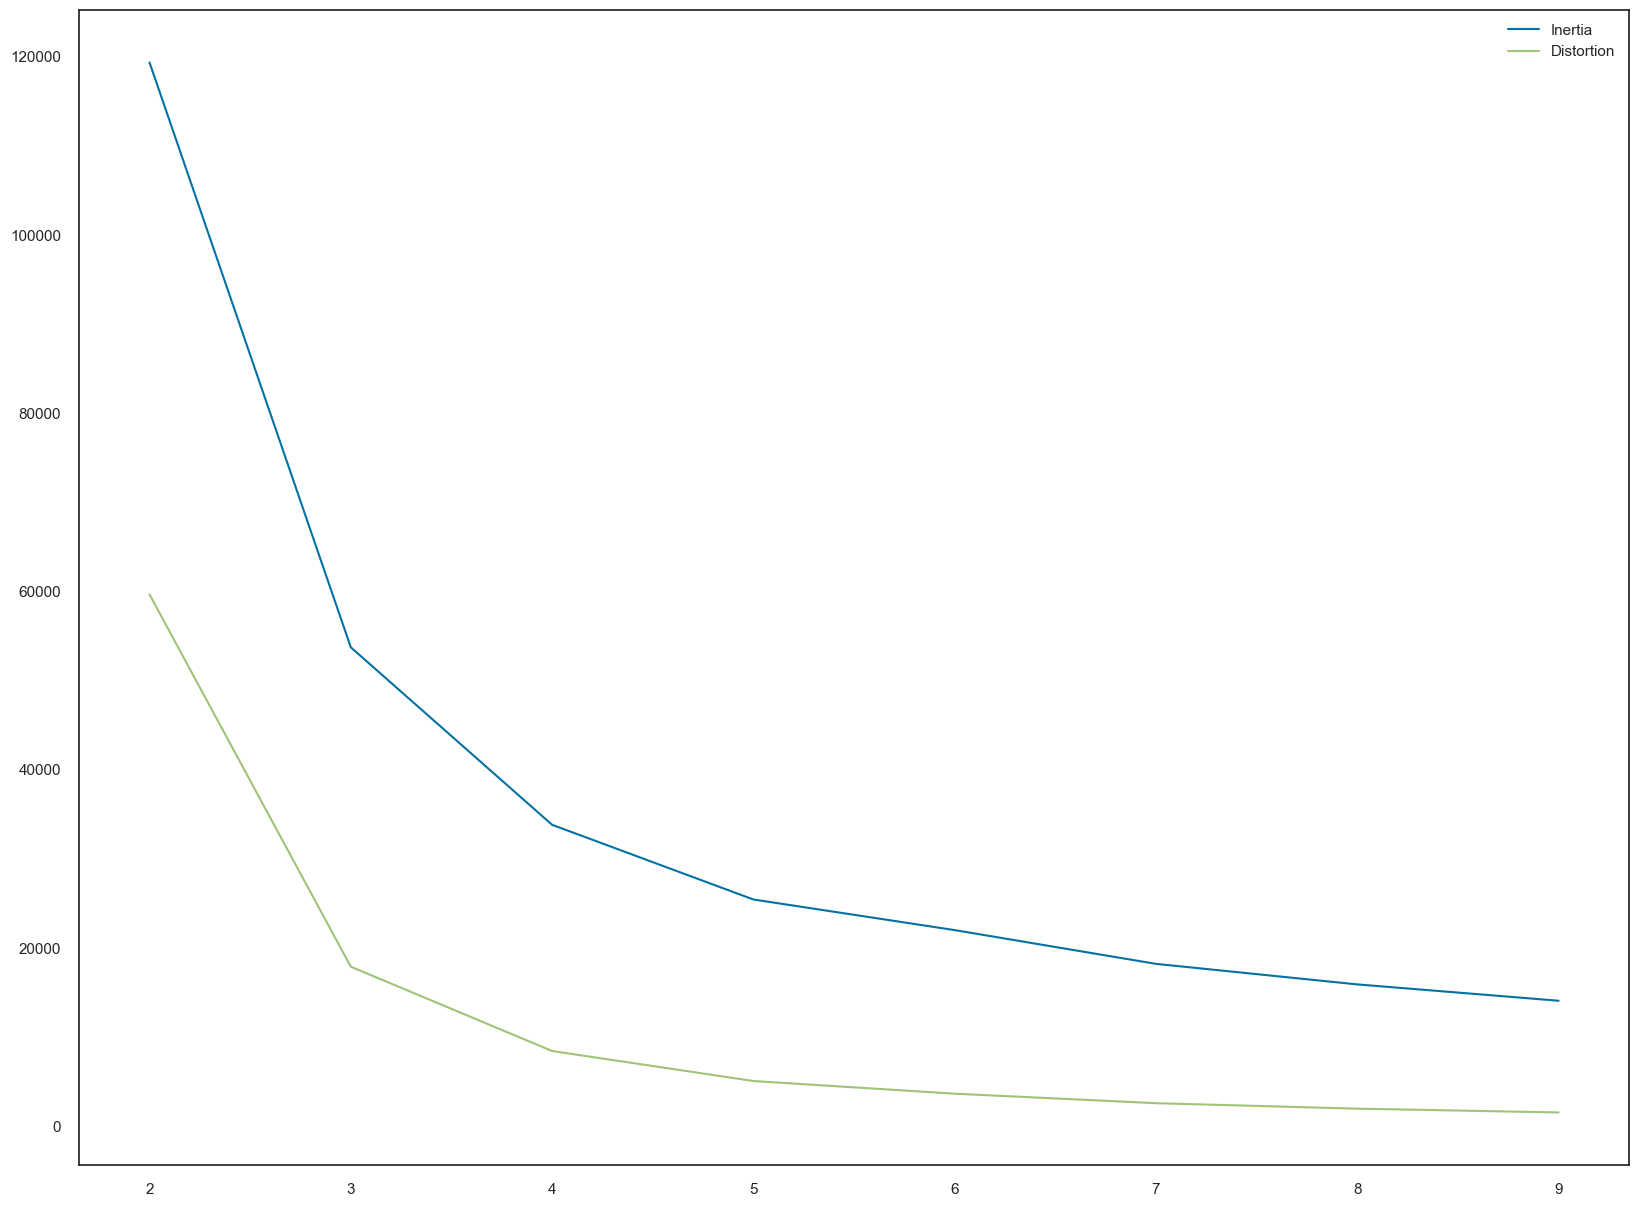

In [103]:
plt.plot(list(range(2,10)), inertias, label='Inertia')
plt.plot(list(range(2,10)), distortions, label='Distortion')
plt.legend()

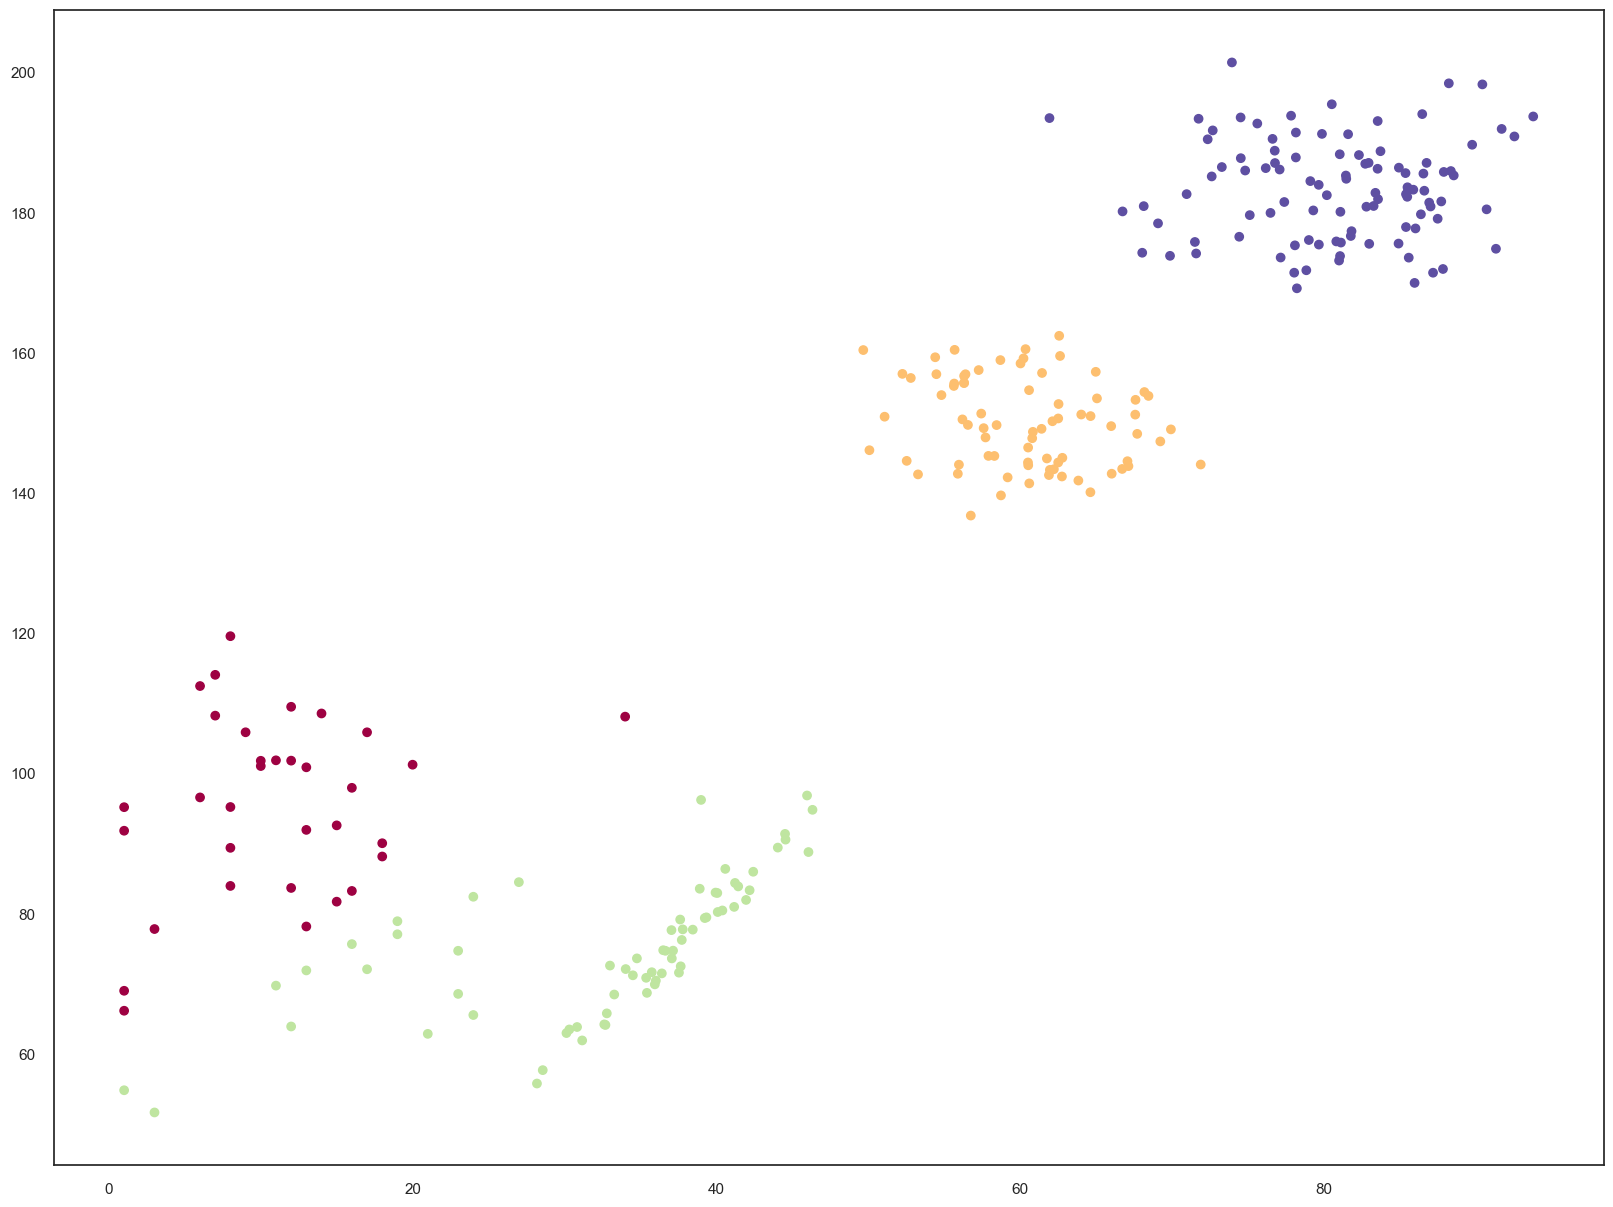

In [104]:

km_clust = KMeans(n_clusters=4)
km_clust.fit(data)
km_labels =  km_clust.labels_

plt.scatter(x, y, c =km_labels, cmap='Spectral_r')

- Plot centers on clustered data

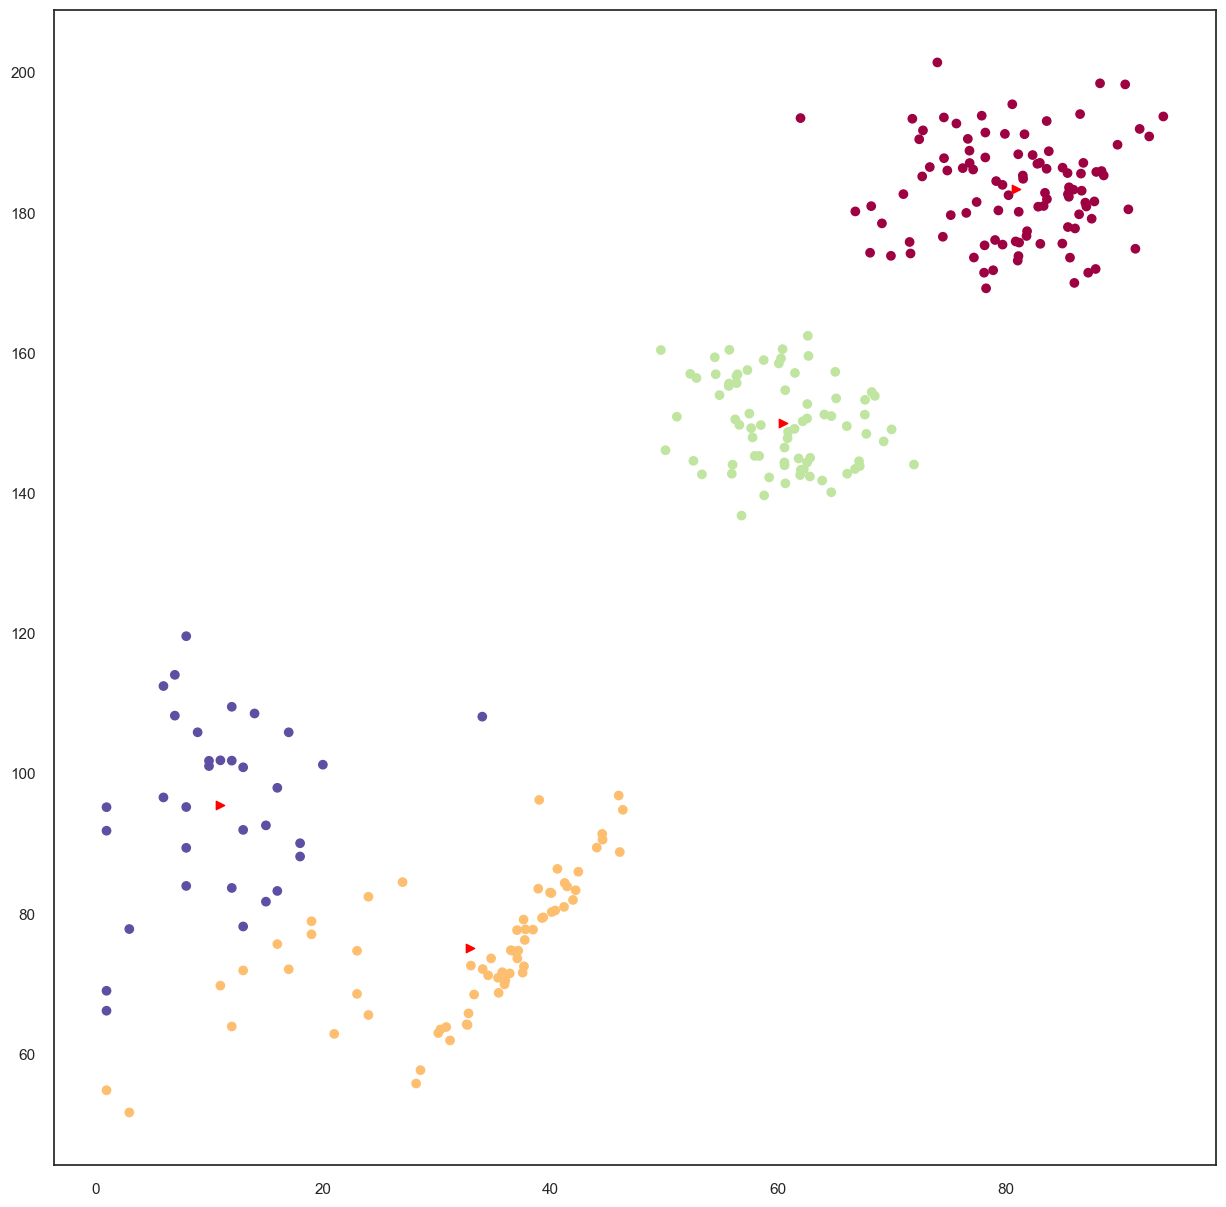

In [105]:

cluster_centers = km_clust.cluster_centers_

fig, ax = plt.subplots(figsize=(15,15))

ax.scatter(x, y, c =km_labels, cmap='Spectral')

for (center_x,center_y) in cluster_centers:
    ax.scatter(center_x, center_y, color = 'red', marker='>')

#### Disadvantages of K-Means

1. **All points need not be cluster-able** : We’ve allocated every single point to a cluster, so this is the assumption that your partitioning instead of clustering, that’s saying theres no noise, no background, all the data is clean and lovely. This is like taking a square peg and hammering it into a round hole.

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.YP8JSA6PQBRYmF0q1JprSQHaDt%26pid%3DApi&f=1&ipt=26010789310093a086e8bea3a140ab7699ca3900cf19efd985182b567767b832&ipo=images" width="350" align="center">



#### You could manually filter outliers ... if you can define them



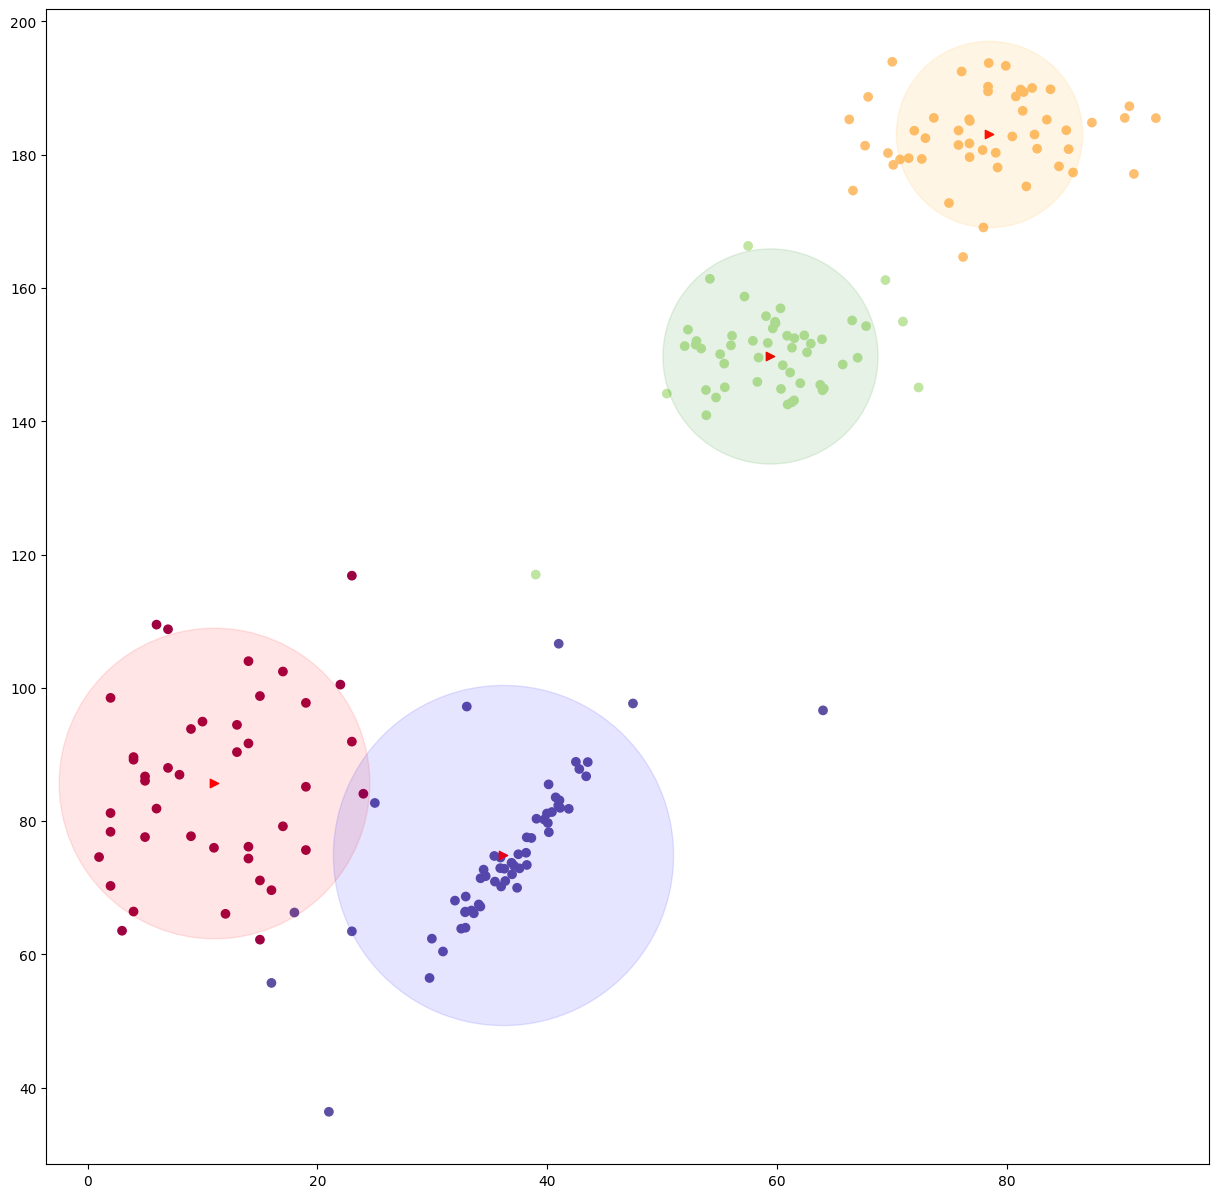

In [12]:

colors =  ['red', 'orange', 'green', 'blue']
thresholds = [50000, 18000, 24000, 60000]
for (center_x,center_y), threshold, color in zip(cluster_centers,thresholds, colors):
    ax.scatter(center_x, center_y, c=color, alpha=0.1, s=threshold)
    
fig


2. Another disadvantage is that `KMeans` is a centroid based technique. At the end, all points got allocated to the center that was closest to them. <br>Thats a `gaussian ball` assumption. Its like saying “my clusters are always sphericals”.



<center> <b> Asuming that all of your data is spherical is like assuming spherical cows. <br>  
<br>
<center><img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F1.bp.blogspot.com%2F-3QVi-DC-CIY%2FUS9xsZo6wnI%2FAAAAAAAAACU%2FvovY7Y9_xGM%2Fw1200-h630-p-k-no-nu%2Ffat-cow.jpg&f=1&nofb=1&ipt=d9c051e3a0ad75bbf34260a2fbd10d4a20c12471b9df795211e095066b8d8f99&ipo=images" width="500" align="center">

 Sure one or two might exist, but in general its probably not a great assumption.

#### There are ways around these disadvantages
- You can use other algorithms that use the concept of noise, some of centroid based techniques for this are [`Birch`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) and [`MeanShift`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
- Later we will see a density based approach that can also do this, called [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

### What if we tried another clusterer?

 

#### [Affinity Propagation](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation)  

This is a graph-based clustering algorithm. It does not fall specifically into the centroid-based or density-based clustering categories. <br>
Creates clusters by sending messages between pairs of samples until convergence.  

Affinity Propagation involves passing messages between data points to identify key observations, called exemplars. Unlike `k-means`, it doesn't need a preset number of clusters to look for. Instead, you can set a `preference` to influence the likelihood of a data point becoming an exemplar, indirectly affecting the cluster count.

<center><img src="https://dashee87.github.io/images/affinity_propagation_similarity.gif" width="750" align="center">


<details>
<summary> Click here (For the interested)</summary>
<br>

$P$ begins with an affinity (or similarity) matrix (S), where the affinity $(s(i,j))$ is usually defined as the distance between data points, often as negative Euclidean distance. The matrix's diagonal (s(i,i)) is key because it contains the `preference` value. Essentially, the "message passing between points" involves the updating of two specific matrices. The "responsibility" matrix $(R)$ has $r(i,k)$ values, showing how apt data point $k$ is to act as the exemplar for point $i$. Conversely, the "availability" matrix $(A)$ has $a(i,k)$ values, highlighting how fitting point k is to be the exemplar for point $i$, considering k's potential role as the exemplar for other points.

These matrices start at zero and get updated iteratively based on certain rules:

$r(i,k)=s(i,k)−maxk′≠k{a(i,k′)+s(i,k′)}$    
$a(i,k)i≠k=min(0,r(k,k)+∑i′∉{i,k}max(0,r(i′,k)))$    
$a(k,k)=∑i′≠kmax(0,r(i′,k))$  

<br>


At each iteration, A and R are added together. Exemplars are represented by rows in which the diagonal of this matrix are positive (i.e. $r(i,i) + s(i,i) > 0)$.  
The algorithm terminates after a specified number of updates or if the exemplars remain unchaged over several iterations. Points are then mapped to the nearest examplar and clustered accordingly.

<center><img src="https://dashee87.github.io/images/affinity_propagation_exemplars.gif" width="750" align="center">
</details>

In [127]:

from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-.8e4, random_state=random_state).fit(data)
cluster_centers_indices = af.cluster_centers_indices_
afprop_labels = af.labels_

print(set(af.labels_))

{0, 1, 2, 3, 4}


Text(0.5, 1.0, 'Affinity prop.')

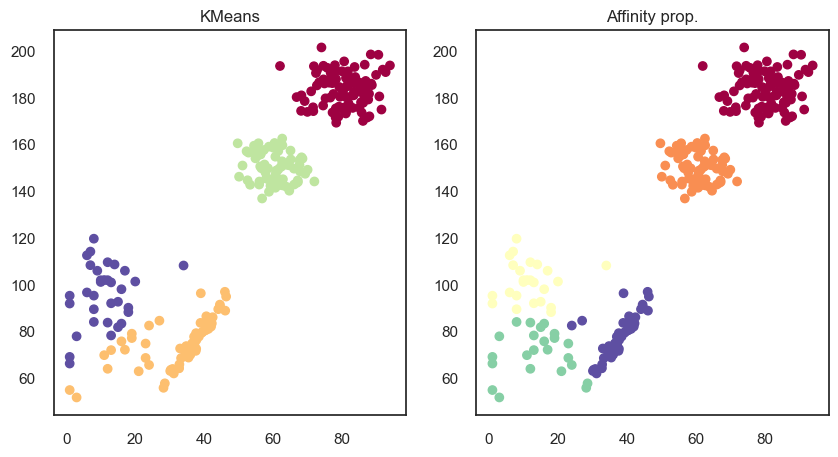

In [128]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(x, y, c =km_labels, cmap='Spectral')
ax[0].set_title('KMeans')

# this just remaps the labels so that the color of each cluster is consistent accross plots
#afprop_labels = remap_labels(af,km_clust.cluster_centers_ )
ax[1].scatter(x, y, c = afprop_labels, cmap='Spectral')
ax[1].set_title('Affinity prop.')

### Heirarcal methods





Idea now is to construct a hierarchy of clusters based on proximity (e.g Euclidean distance or Manhattan distance). HC typically comes in two flavours (essentially, bottom up or top down):

1. **Divisive**: Starts with the entire dataset comprising one cluster that is iteratively split- one point at a time- until each point forms its own cluster.

2. **Agglomerative**: Starts with individual points, iteratively combined until all points belong to the same cluster.
<br>  



#### [**AgglomerativeClustering**](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) 

<center><img src="https://dashee87.github.io/images/hierarch.gif" width="750" align="center">

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
agglo = AgglomerativeClustering(metric='euclidean', n_clusters=4) # or you can choose not to pre-specify number of clusters

agglo.fit(data)


AgglomerativeClustering(metric='euclidean', n_clusters=4)

Another important concept in HC is the linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step. 

#### Some of the parameters...

- `metric` (str) or callable, default=`None`

Distance metric used to compute the linkage. Can be `euclidean`, `l1`, `l2`, `manhattan`, `cosine`, or `precomputed`. <br> 
- If set to None then `euclidean` is used. <br>
- If linkage is `ward`, only `euclidean` is accepted. <br> 
- If `precomputed`, a distance matrix is needed as input for the fit method.

#### So, how many clusters did it find?

In [17]:
agglo.n_clusters_

4

#### Many roads to Rome

The [linkage criterion]((https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)) determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion, resulting in different clusters.

- `ward` minimizes the variance of the clusters being merged.

- `average` uses the average of the distances of each observation of the two sets.

- `complete` linkage uses the maximum distances between all observations of the two sets.

- `single` uses the minimum of the distances between all observations of the two sets.

In [137]:
agglo = AgglomerativeClustering(  linkage='complete', n_clusters=4)

agglo.fit(data)

agg_c_labels = agglo.labels_

With agglomerative clustering, you can recover the distances between nodes in the corresponding place. <br>
The cluster object has a `children_` attribute, which is only computed if distance_threshold is used or compute_distances is set to `True`.

In [139]:
agglo = AgglomerativeClustering(compute_distances=True, n_clusters=4)

agglo.fit(data)

agg_labels = agglo.labels_



### Building a dendogram




This shows the hierarchical relationship between data points.

You can access the children of each non-leaf node. Values less than `n_samples` correspond to leaves of the tree which are the original samples. <br>  

In [140]:

agglo.children_.shape, agglo.distances_.shape

((274, 2), (274,))

 A node i greater than or equal to n_samples is a non-leaf node and has children `children_[i - n_samples]`. <br>  
 Alternatively at the i-th iteration, `children[i][0]` and `children[i][1]` are merged to form node `n_samples + i`.<br>  
 **Lets use these structures to build a dendogram**

In [141]:
from scipy.cluster.hierarchy import dendrogram

In [142]:
# Create a function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create an array to store the counts of samples in each cluster
    counts = np.zeros(model.children_.shape[0])

    # Get the total number of samples
    n_samples = len(model.labels_)

    # Iterate through each cluster formed in the model
    for index, child in enumerate(model.children_):
        # Initialize the current count of samples in the current cluster
        current_count = 0

        # Iterate through each child index in the current cluster
        for child_idx in child:
            # Check if the child index is less than the total number of samples
            if child_idx < n_samples:
                # If it is, increment the current count by 1
                current_count += 1
            else:
                # If it is greater than or equal to the total number of samples,
                # increment the current count by the count of samples in that child cluster
                current_count += counts[child_idx - n_samples]

        # Store the current count in the 'counts' array
        counts[index] = current_count

    # Create a linkage matrix that contains cluster linkage information
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the dendrogram using the linkage matrix and any additional keyword arguments
    dendrogram(linkage_matrix, **kwargs)


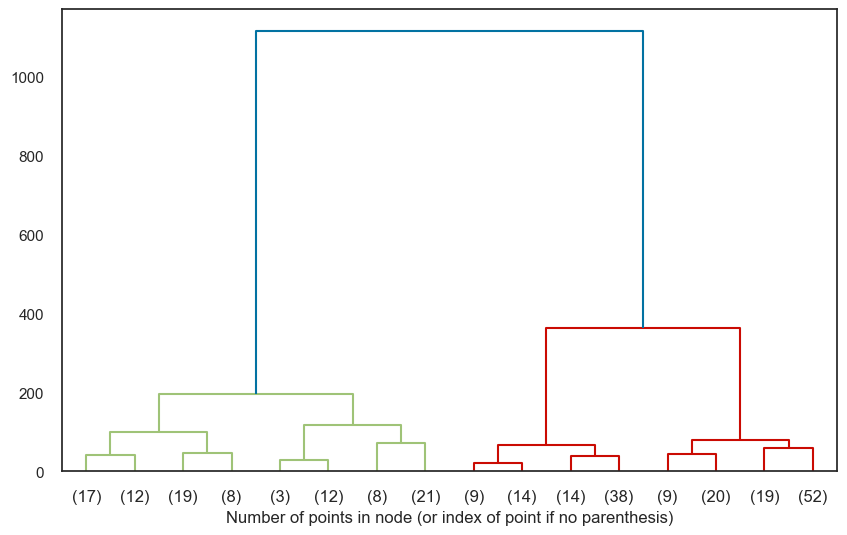

In [143]:


plt.figure(figsize=(10, 6))
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

 The y-axis typically represents a measure of dissimilarity or distance between data points or clusters. This measure is often referred to as the "height" or "distance" on the y-axis.



**At the Bottom**: The leaves of the dendrogram represent individual data points (items or samples).

**Towards the Top**: As you move up the y-axis, you encounter branch points where clusters of data points merge together. The height at which two clusters merge represents the dissimilarity or distance between them. In hierarchical clustering, this is often computed using metrics such as single linkage, complete linkage, or average linkage.

**Top of the Dendrogram**: Finally, at the very top of the dendrogram, you have a single cluster that contains all the data points. The height at which this single cluster is formed represents the maximum dissimilarity in the dataset, and it can be thought of as the "distance" between the most dissimilar clusters.

#### Visualizing output from different clustering algorithms
- Practical problem when clustering:

Each algorithm will assign different label IDs to the same point, which can make plotting a bit confusing. You can solve this by a helper function that takes some reference centroids (from our KMeans algorithm for example) and a new set of centroids provided by another clustering algorithm, to map the new points onto the same label IDs. Only works if the reference centroids have the same number as the new clusters.

In [144]:
from sklearn.metrics import pairwise_distances_argmin

def remap_labels(labels,reference_centroids ):

    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(len(reference_centroids))])
    # Map new centroids to nearest reference centroids
    mapped_labels = pairwise_distances_argmin(new_centroids, reference_centroids)
    label_map = {i: mapped_labels[i] for i in range(len(reference_centroids))}
    return np.array([label_map[label] for label in labels])


In [147]:
agg_labels = remap_labels(agg_labels,km_clust.cluster_centers_ )



Text(0.5, 1.0, 'Agglomerative')

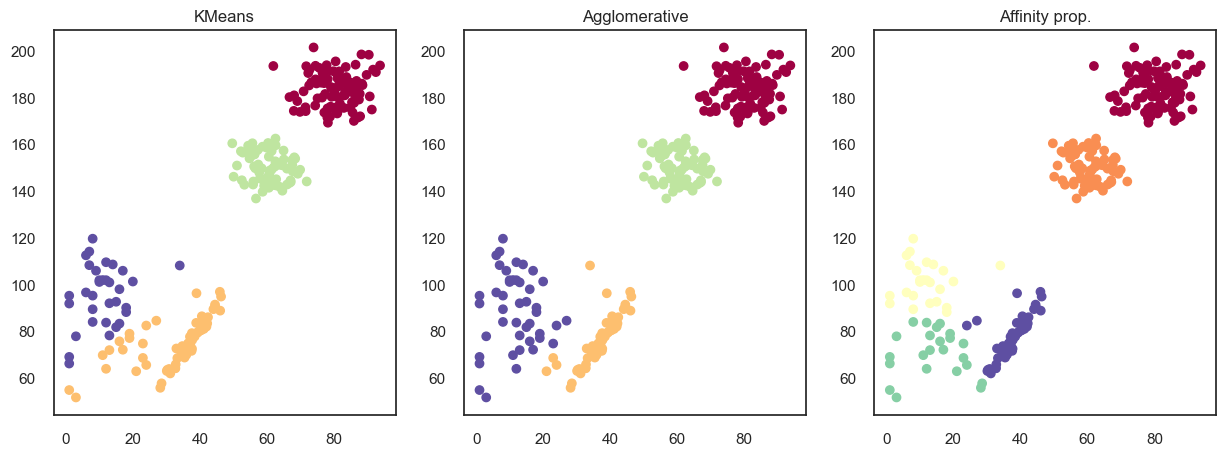

In [151]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(x, y, c =km_labels, cmap='Spectral')
ax[0].set_title('KMeans')

ax[2].scatter(x, y, c = afprop_labels, cmap='Spectral')
ax[2].set_title('Affinity prop.')

ax[1].scatter(x, y, c = agg_labels, cmap='Spectral')
ax[1].set_title('Agglomerative')



### Distance Metrics in Clustering






- **Beyond the Straight Line:** While Euclidean ("straight-line") distance is common, clustering employs a diverse range of metrics to suit different data types and structures.

- **Handling Categorical Data:** Metrics like Hamming or Jaccard quantify the "distance" between categorical data points, translating abstract similarities into concrete numbers.

- **Scale Matters:** Feature scaling is crucial. Without it, larger-scaled features might overshadow others, skewing distance calculations.

- **Angles in High Dimensions:** For high-dimensional data, like text vectors, cosine similarity focuses on the directionality rather than magnitude of data points.

- **City Grid Analogies:** Manhattan distance, inspired by a taxi's path in a city grid, can give different perspectives compared to the Euclidean metric.

- **Cluster-to-Cluster Distances:** Hierarchical clustering introduces concepts like linkage methods, determining how the "distance" between entire clusters is computed.

- **Time Series Quirks:** For time series data, Dynamic Time Warping (DTW) adjusts sequences to make them comparable, redefining traditional distance notions.

- **Domain Dictates Metric:** The most fitting distance metric often hinges on domain-specific knowledge. For instance, in genomics, evolutionary distances can capture the number of separating mutations.


##### [SciPy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) package in python can be used to compute distance matrix based on different ways to define distance <br> 
- [Here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) are some of the available distance functions.


**Lets try one out from `SciPy`**:

The [Minkowski distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html#scipy.spatial.distance.minkowski) is a way to measure the distance between two points in multi-dimensional space. It's a flexible distance metric that can be adjusted based on a parameter \(p\). Depending on the value of \(p\):

1. When $(p = 1)$, it's the `Manhattan distance`: It measures the distance by adding up the absolute differences between coordinates along each dimension. It's like moving along city blocks.

2. When $(p = 2)$, it's the `Euclidean distance`: It measures the straight-line distance between two points, as you would calculate using the Pythagorean theorem.

3. As $(p)$ gets larger, the distance metric becomes more focused on the maximum absolute difference along any dimension, called the `Chebyshev distance`.

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fglobal.discourse-cdn.com%2Fstandard17%2Fuploads%2Fopengenus%2Foriginal%2F1X%2F897d9cea224e4364325a9ceea07ee4e8d272ac08.jpeg&f=1&nofb=1&ipt=258b313f1651d21d6fc58685774994b00007c47013179344845c5670b410d9c7&ipo=images" alt="Drawing" style="width: 1000px;"/></center>


**`Minkowski distance` lets you choose how to measure distance based on the situation**: <br> Focusing on individual dimensions, finding straight-line distance, or emphasizing extreme differences.



In [152]:
from scipy.spatial.distance import minkowski

# Define a custom distance function using Scipy
def custom_distance(X):
    # Replace this with your own distance computation logic
    n_samples = X.shape[0]
    dist_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            dist_matrix[i, j] = minkowski(X[i], X[j], p=10, w=None)
            dist_matrix[j, i] = dist_matrix[i, j]
    return dist_matrix

In [153]:

# Compute the pairwise distance matrix using the custom distance function
distance_matrix = custom_distance(data)


distance_matrix.shape

(275, 275)

- Use the distance matrix to perform clustering instead of the original data

In [154]:
agglo = AgglomerativeClustering(metric='precomputed',  linkage='average', n_clusters=4)

agglo.fit(distance_matrix)

agg_mink_labels = agglo.labels_

agg_mink_labels = remap_labels(agg_mink_labels, km_clust.cluster_centers_ )

- How do all these compare ?

Text(0.5, 1.07, 'Spot the difference?')

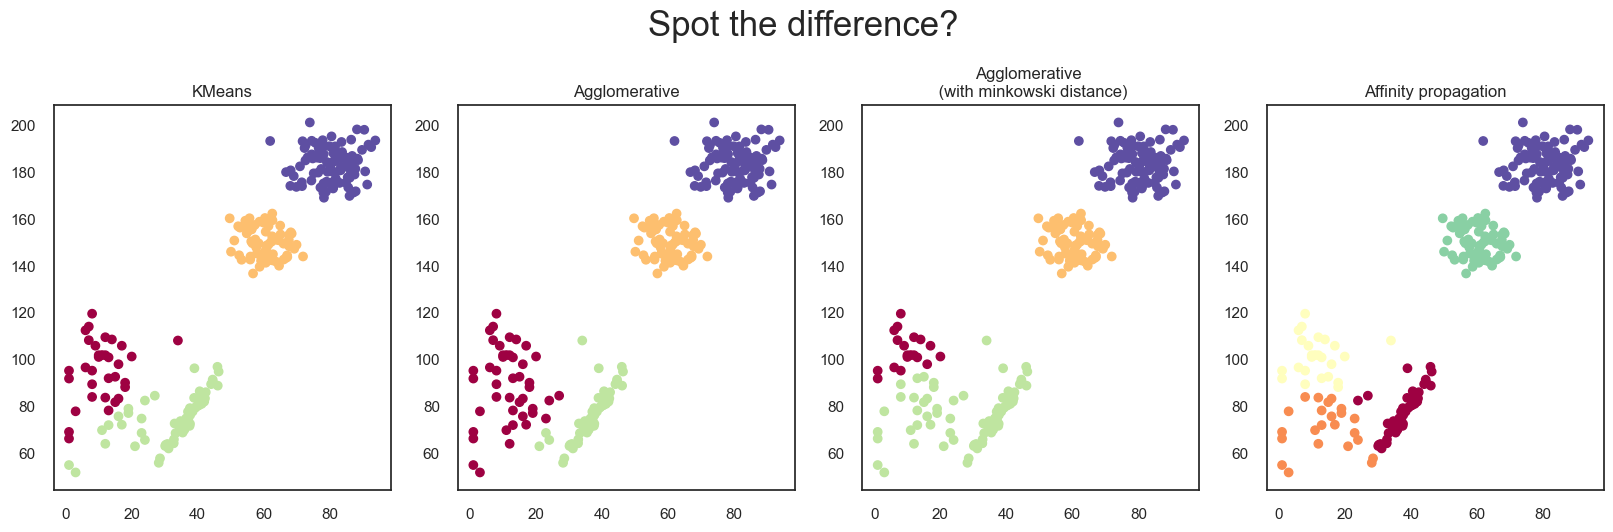

In [155]:


fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].scatter(x, y, c = km_labels, cmap='Spectral_r')
ax[0].set_title('KMeans')

ax[1].scatter(x, y, c = agg_labels, cmap='Spectral_r')
ax[1].set_title('Agglomerative')


ax[2].scatter(x, y, c = agg_mink_labels, cmap='Spectral_r')
ax[2].set_title('Agglomerative \n (with minkowski distance)')


ax[3].scatter(x, y, c = afprop_labels, cmap='Spectral_r')
ax[3].set_title('Affinity propagation')

plt.suptitle('Spot the difference?', size=25,  y=1.07)

#### Takebacks

- You saw density based clustering, centroid based clustering, and heirarcal clustering, each makes different assumptions about the input data, distance metrics, and how to define a cluster
- Some clustering algorithms will require your knowledge of how many clusters to expect, others will do this automatically
- Defining your idea of distance between points can be key in clustering

# Part 2 : High(er) dimentional data

### Loading data

In [29]:
from yellowbrick.cluster import KElbowVisualizer
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [1]:

import requests
# Code file URL
code_url = 'https://raw.githubusercontent.com/NiloyPurkait/Unsupervised-learning/Clustering/master/clustering_intro_helpers.py'



# Download the Code File
code_response = requests.get(code_url)
with open('clustering_intro_helpers.py', 'wb') as code_file:
    code_file.write(code_response.content)


In [30]:
from clustering_intro_helpers import *

Todays dataset: [Customer personality analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [2]:

data = pd.read_csv('https://raw.githubusercontent.com/NiloyPurkait/Unsupervised-learning/Clustering/master/marketing_campaign.csv', sep="\t")

print(raw_len:= len(data))

2240


In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Getting an idea of your data



#### As always, we need to know which features are discrete, continuous, ordinal, etc.






- Continuous features should be scaled or standardized, discrete features one-hot encoded, but ordinal features may be tricky.

<details>

<summary> <b>Click me</b> for tips on handling ordinal features</summary>
Treating ordinal features in clustering is an important consideration because, unlike nominal features (categorical variables without intrinsic order), ordinal features have a natural order. However, they don't necessarily have consistent intervals between levels, making their treatment slightly nuanced.

Here's how you can approach ordinal features for clustering:

1. **Label Encoding**: 
   - Since ordinal variables have a natural order, you can convert them into meaningful numeric codes. For instance, for the ordinal variable `Education` with levels `{"High School", "Bachelor's", "Master's", "Ph.D."}`, you can encode them as `{0, 1, 2, 3}` respectively.  
<br>
   
2. **Scaling**:
   - Even after label encoding, it might be beneficial to scale the ordinal features, especially if you're using clustering algorithms like KMeans that are sensitive to the magnitude of the data. Standard scaling methods like Min-Max scaling or Z-score normalization can be employed.  
 However, it's crucial to remember that the distance between encoded ordinal values might not truly represent the "distance" or "difference" in the actual data, so use this with caution.  
<br>
   
3. **Bin as Categories**:
   - If the ordinal scale's inherent order is not crucial for your analysis or if it has too many levels, you can bin them into broader categories and then use one-hot encoding. This might lead to increased dimensionality, though.  
<br>

4. **Custom Distance Metrics**:
   - For algorithms where you can define a custom distance metric (e.g., hierarchical clustering), you can design a distance function that respects the ordinal nature of the data.   
<br>

5. **Embedding Techniques**:
   - For high cardinality ordinal features, embedding techniques such as word embeddings (if they can be applied contextually) might be beneficial. This is more unconventional but can be useful in specific contexts.  
<br>

6. **Consider Cluster Algorithm Sensitivity**:
   - Not all clustering algorithms treat feature scales in the same way. For instance, DBSCAN or hierarchical clustering might deal differently with ordinal features than KMeans. Choose an algorithm that aligns with the nature and importance of the ordinal feature in the dataset.  
<br>  

Remember, the treatment of ordinal features often requires domain knowledge. Understanding the significance and semantics of the ordinal scale in the context of the problem can guide the optimal preprocessing strategy.

In [173]:
#data.columns

#data.dtypes

#data[column_name].nunique()

#data[column_name].unique()

#data[column_name].isna().sum()/ len(data) * 100

- This function (see `clustering_intro_helpers.py`) takes care of some things we'd like to know about our data

In [174]:
d_types_report(data)

Columns Data_Types  \
0                    ID      int64   
1            Year_Birth      int64   
2             Education     object   
3        Marital_Status     object   
4                Income    float64   
5               Kidhome      int64   
6              Teenhome      int64   
7           Dt_Customer     object   
8               Recency      int64   
9              MntWines      int64   
10            MntFruits      int64   
11      MntMeatProducts      int64   
12      MntFishProducts      int64   
13     MntSweetProducts      int64   
14         MntGoldProds      int64   
15    NumDealsPurchases      int64   
16      NumWebPurchases      int64   
17  NumCatalogPurchases      int64   
18    NumStorePurchases      int64   
19    NumWebVisitsMonth      int64   
20         AcceptedCmp3      int64   
21         AcceptedCmp4      int64   
22         AcceptedCmp5      int64   
23         AcceptedCmp1      int64   
24         AcceptedCmp2      int64   
25             Complain      int64   
26        Z_CostContact      int64   
27            Z_Revenue      int64   
28             Response      int64   

                                        Unique_values  N_Uniques  Null_Values  \
0                      [5524, 2174, 4141, 6182, 5324]       2240            0   
1                      [1957, 1954, 1965, 1984, 1981]         59            0   
2          [Graduation, PhD, Master, Basic, 2n Cycle]          5            0   
3        [Single, Together, Married, Divorced, Widow]          8            0   
4       [58138.0, 46344.0, 71613.0, 26646.0, 58293.0]       1974           24   
5                                           [0, 1, 2]          3            0   
6                                           [0, 1, 2]          3            0   
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...        663            0   
8                                [58, 38, 26, 94, 16]        100            0   
9                            [635, 11, 426, 173, 520]        776            0   
10                                 [88, 1, 49, 4, 43]        158            0   
11                             [546, 6, 127, 20, 118]        558            0   
12                              [172, 2, 111, 10, 46]        182            0   
13                                 [88, 1, 21, 3, 27]        177            0   
14                                 [88, 6, 42, 5, 15]        213            0   
15                                    [3, 2, 1, 5, 4]         15            0   
16                                    [8, 1, 2, 5, 6]         15            0   
17                                   [10, 1, 2, 0, 3]         14            0   
18                                   [4, 2, 10, 6, 7]         14            0   
19                                    [7, 5, 4, 6, 8]         16            0   
20                                             [0, 1]          2            0   
21                                             [0, 1]          2            0   
22                                             [0, 1]          2            0   
23                                             [0, 1]          2            0   
24                                             [0, 1]          2            0   
25                                             [0, 1]          2            0   
26                                                [3]          1            0   
27                                               [11]          1            0   
28                                             [1, 0]          2            0   

    Null_Values_percentage  
0                 0.000000  
1                 0.000000  
2                 0.000000  
3                 0.000000  
4                 1.071429  
5                 0.000000  
6                 0.000000  
7                 0.000000  
8                 0.000000  
9                 0.000000  
10                0.000000  
11                0.000000  
12                0.000000  
13                0.000000  
14       

<details>
<summary> Click for Feature descriptions </summary>

Content
Attributes

#### People

- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years
- `Promotion`

- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place 

- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month

The dataset for this project is provided by Dr. Omar Romero-Hernandez, available on [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download)


See also [an interesting analysis](https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/)
</details>

In [175]:
data = data.dropna()
print("Percent removed:", ((raw_len - len(data))/raw_len)*100)

Percent removed: 1.0714285714285714


### Feature Engineering




- Next, we will derive a new attribute from `Dt_Customer`. This will represent the duration a customer has been in the company's records. 

- It's based on the time difference between each customer's registration date and the most recent registration in the database.

**First step**:  Identify the earliest and latest registration dates.

**Second step**: make a new attribute `Customer_For` that shows the number of days since a customer's first purchase, compared to the most recent purchase date in the records.

In [176]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"]).dt.date

dates = data["Dt_Customer"].tolist()
max_date = data["Dt_Customer"].max()


- Dates of the newest and oldest recorded customer

In [177]:

print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


Creating a feature `Customer_For` of the number of days the customers started to shop in the store relative to the last recorded date

In [178]:
data["Customer_For"] = (max_date - data["Dt_Customer"]).dt.days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

data["Customer_For"] .head()

0    971
1    125
2    472
3     65
4    321
Name: Customer_For, dtype: int64



- Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.


In [179]:
# Age of the customer
data["Age"] = 2023 - data["Year_Birth"]



- Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.


In [180]:
# Total spending on various items
data["Spent"] = data["MntWines"]         + \
                data["MntFruits"]        + \
                data["MntMeatProducts"]  + \
                data["MntFishProducts"]  + \
                data["MntSweetProducts"] + \
                data["MntGoldProds"]



- Now some dimentionality reduction. Lets start with `Education` and `Marital Status` and see how many unique values there are

In [181]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")


Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



- Create another feature `Living_With` out of `Marital_Status` to extract the living situation of couples.


In [182]:
# Deriving living situation from marital status
data["Living_With"] = data["Marital_Status"].replace({"Married": "Partner",
                                                    "Together": "Partner", 
                                                    "Absurd": "Alone",
                                                    "Widow": "Alone",
                                                    "YOLO": "Alone",
                                                    "Divorced": "Alone",
                                                    "Single": "Alone"})


- Create three categories in the `Education` by simplifying its value counts.

In [183]:
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [184]:
# Simplifying education levels
data["Education"] = data["Education"].replace({"Basic": "Undergraduate",
                                                "2n Cycle": "Undergraduate",
                                                "Graduation": "Graduate",
                                                "Master": "Master",
                                                "PhD": "PhD"})


- Create a feature `Children` to indicate total children in a household that is, kids and teenagers.


In [185]:
# Total children in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]



- To get further clarity of household, Creating feature indicating `Family_Size`



In [186]:
# Family size
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]



- Create a feature `Is_Parent` to indicate parenthood status


In [187]:
# Parenthood status
data["Is_Parent"] = np.where(data["Children"] > 0, 1, 0)




- Rename some columns to make life easy

In [188]:
# Renaming columns
data = data.rename(columns={"MntWines": "Wines",
                            "MntFruits": "Fruits",
                            "MntMeatProducts": "Meat",
                            "MntFishProducts": "Fish",
                            "MntSweetProducts": "Sweets",
                            "MntGoldProds": "Gold"})



- Dropping some of the redundant features

In [189]:
# Dropping redundant features 
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

- Look at summary statistics

In [190]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000   2216.000000   
mean       0.064079      0.013538     0.009477     0.150271    512.006318   
std        0.244950      0.115588     0.096907     0.357417    232.469034   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     0.000000     0.000000    340.000000   
50%        0.000000      0.000000     0.000000     0.000000    513.000000   
75%        0.000000      0.000000     0.000000     0.000000    686.000000   
max        1.000000      1.000000     1.000000     1.000000   1063.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

- The above stats show some discrepancies in mean & max Income and Age 

- Do note that max-age is 130 years, as its calculate using current year, but this data might have been gathered long ago

- We could go for some outlier removal, filter out very old & extremely rich people, as their spending patterns might erode patterns for other groups

In [191]:
# Removing outliers for "Age" and "Income"
data = data[(data["Age"] < 90) & (data["Income"] < 600000)]
print("Percent removed:", ((raw_len - len(data))/raw_len)*100)

Percent removed: 1.25


In [192]:
#Get list of categorical variables

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


- Encode all categorical data using scikit-learn's `LabelEncoder`

In [193]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder


LE=LabelEncoder()
for feature in object_cols:
    data[feature]=data[[feature]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


### Feature Selection  


[Variance Thresholding](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)<br>
Some features provide no information that allows ML models to categorize the data. Variance Threshold is a feature selector that removes all the low variance features from the dataset that are of no great use in modeling.

It looks only at the features (x), not the desired outputs (y), and can thus be used for unsupervised learning.

In [53]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(data)
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False])



- `True`: High Variance
- `False`: Low Variance

We could now delete the columns which have low varience. 

In [54]:
con_cols = [col for col in data.columns 
          if col not in data.columns[var_thr.get_support()]]

for features in con_cols:
    print(features)

AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response
Living_With
Is_Parent


In [196]:
data = data.drop(con_cols, axis=1)

### Scaling data



When it comes to choosing a scaler for clustering (especially K-means), it is recommended to use `standard scaling`` (also known as z-score normalization) or `min-max scaling`. Both options have their advantages and can be effective depending on the characteristics of your data.

- Standard Scaling [(StandardScaler)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):
transforms the data to have zero mean and unit variance. It subtracts the mean from each data point and divides it by the standard deviation. This scaling method is suitable when the distribution of your data is approximately Gaussian (or bell-shaped).

- Min-Max Scaling [(MinMaxScaler)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html):
transforms the data to a fixed range, typically between 0 and 1. It subtracts the minimum value from each data point and divides it by the range (maximum value minus minimum value). This scaling method is useful when you have prior knowledge about the range of your data or when you want to preserve the original distribution shape.

To determine which scaler to use for clustering, you can try both options and compare the results. It's important to note that the choice of scaler may depend on the specific characteristics of your data and the goals of your clustering analysis. As always, you can evaluate the clustering performance using metrics such as the silhouette score or the sum of squared errors (SSE) to assess the quality of the resulting.

In [197]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


In [198]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.868542  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.868542 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.868542  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.868542 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.977892  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumDealsPurchases  NumWebPurchases  \
0  1.690293  2.453472  1.483713  ...           0.351030         1.426865   
1 -0.718230 -0.651004 -0.634019  ...          -0.168701        -1.126420   
2 -0.178542  1.339513 -0.147184  ...          -0.688432         1.426865   
3 -0.655787 -0.504911 -0.585335  ...          -0.168701        -0.761665   
4 -0.218684  0.152508 -0.001133  ...           1.390492         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.503607          -0.555814           0.692181      1.973583   
1            -0.571340          -1.171160          -0.132545     -1.665144   
2            -0.229679           1.290224          -0.544908     -0.172664   
3            -0.913000          -0.555814           0.279818     -1.923210   
4             0.111982           0.059532          -0.132545     -0.822130   

        Age     Spent  Children  Family_Size  
0  1.018352  1.676245 -1.264598    -1.758359  
1  1.274785 -0.963297  1.404572     0.449070  
2  0.334530  0.280110 -1.264598    -0.654644  
3 -1.289547 -0.920135  0.069987     0.449070  
4 -1.033114 -0.307562  0.069987     0.449070  

[5 rows x 21 columns]

In [199]:
import seaborn as sns
from matplotlib import colors

### Correlation heatmaps



- This can give you a good intuition of which features to dissect your clustering results by later on

<Axes: >

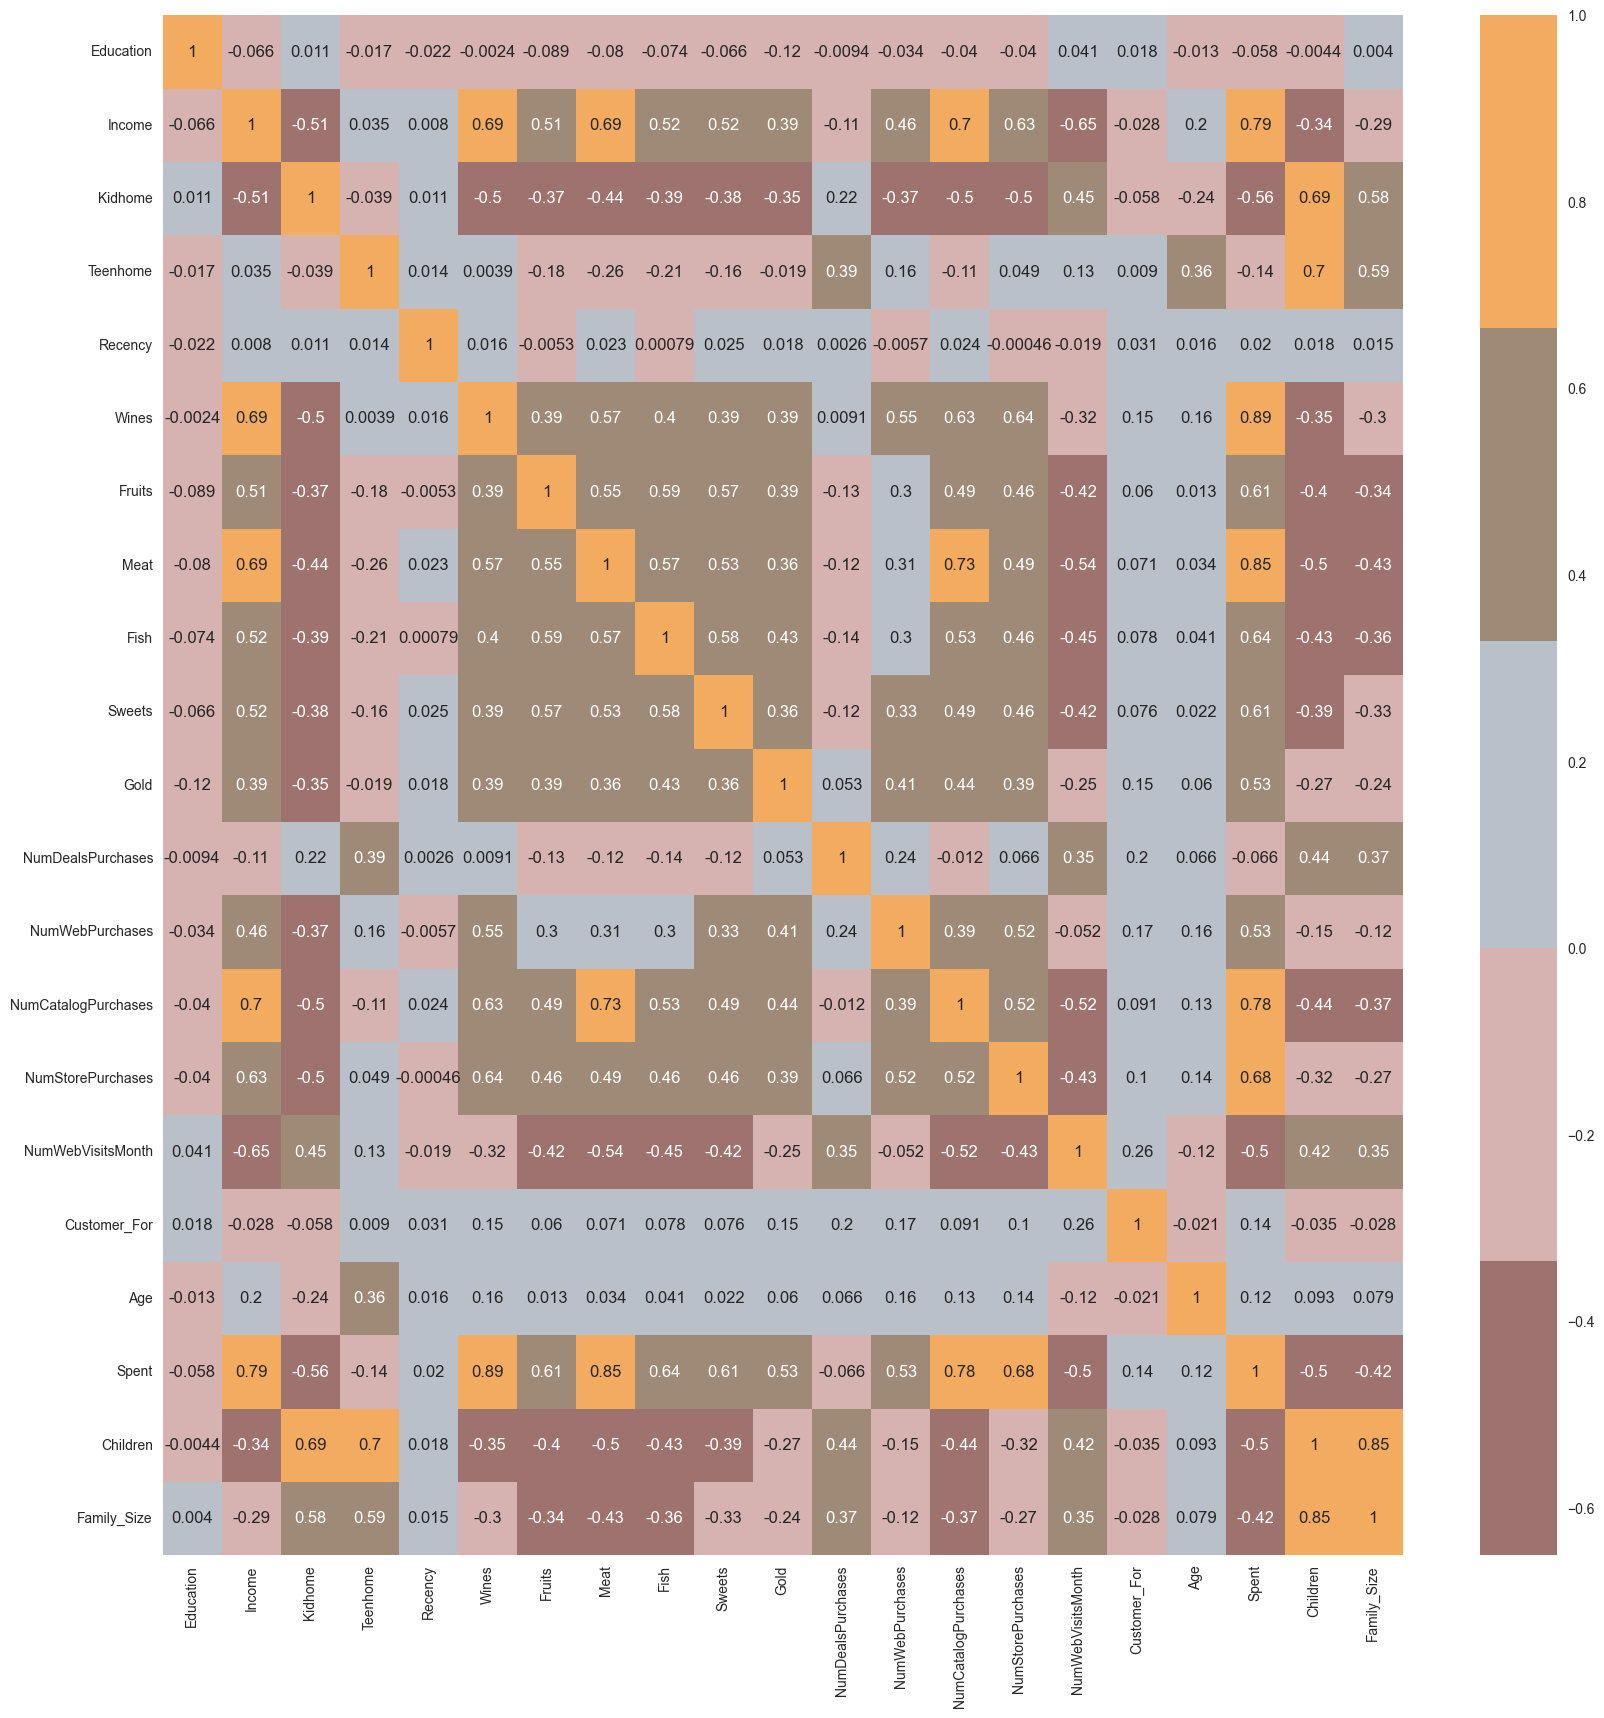

In [59]:
plt.figure(figsize=(20,20))  
corrmat = scaled_ds.corr()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

### Dimensionality reduction 


**[Principal component analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)**<br>
One possible solution is to apply PCA (principal component analysis) before a clustering algorithm (such as k-means). Reducing the number of dimensions in your data often improves the clustering results in practice (noise reduction). 

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=scaled_ds.shape[1])
pca.fit(scaled_ds)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Visualize the explained variance
pca_plot(cumulative_explained_variance, scaled_ds)

While PCA is a popular method for dimensionality reduction, there are several other techniques available. <br>
The choice of dimensionality reduction technique largely depends on the nature of your data and the specific problem you're trying to solve. Some methods are linear and work well when the data lies roughly on a linear subspace, while others are non-linear and can capture more intricate structures in the data.

<details>
<summary><b>What other methods?</b></summary>



Principal Component Analysis (PCA), Uniform Manifold Approximation and Projection (UMAP), t-Distributed Stochastic Neighbor Embedding (t-SNE), and autoencoders amongst the most popular techniques used for dimensionality reduction, but they have different underlying principles and characteristics:

1. **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (Principal Component Analysis):**
   - **Linear Projection:** PCA is a linear dimensionality reduction technique that identifies orthogonal axes (principal components) that capture the maximum variance in the data.
   - **Linearity:** It assumes that the data's structure can be well-represented by linear combinations of the original features.
   - **Interpretability:** Principal components have clear interpretations as linear combinations of the original features, making it useful for feature selection and visualization.
   - **Speed:** PCA is computationally efficient.

2. **[UMAP](https://pypi.org/project/umap-learn/) (Uniform Manifold Approximation and Projection):**
   - **Non-Linear Projection:** UMAP is a non-linear dimensionality reduction technique that preserves both global and local structure in the data.
   - **Flexibility:** UMAP can capture complex relationships in the data and is particularly effective in maintaining neighborhood relationships.
   - **Parameter Tuning:** UMAP requires parameter tuning for optimal results, such as setting the number of neighbors and the minimum distance.

3. **[t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (t-Distributed Stochastic Neighbor Embedding):**
   - **Non-Linear Projection:** t-SNE is a non-linear technique that focuses on preserving local similarities between data points.
   - **Clustering and Visualization:** It is commonly used for visualization and clustering tasks, as it tends to group similar data points together in the low-dimensional space.
   - **Sensitivity to Parameters:** t-SNE's performance can be sensitive to its hyperparameters, such as the perplexity.

4. **[Autoencoders](https://blog.keras.io/building-autoencoders-in-keras.html):**
   - **Neural Network-Based:** Autoencoders are neural network-based models that consist of an encoder and a decoder. They learn an efficient representation of the input data.
   - **Non-Linearity:** Autoencoders can capture non-linear relationships in the data, making them flexible for various tasks.
   - **Unsupervised Learning:** Autoencoders can be trained in an unsupervised manner, learning a compact representation of the data without requiring labeled examples.
   - **Latent Space:** The learned lower-dimensional space is called the "latent space," and it can be used for various downstream tasks like feature extraction and generation.


   


<details>

In [201]:
# Select the number of components based on desired explained variance threshold
desired_explained_variance = 0.95

num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1

print(f"Number of components to explain {desired_explained_variance:.2f} variance: {num_components}")

# Fit PCA with the selected number of components
pca = PCA(n_components=num_components)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=[f"PC{i+1}" for i in range(num_components)])
PCA_ds.head()
#PCA_ds.describe().T

Number of components to explain 0.95 variance: 15


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.706088  0.027710  2.396888  0.210093 -1.022573 -0.633320  1.106426   
1 -2.848951  0.282081 -2.402594  0.547029 -0.092378 -0.843287 -0.089276   
2  2.299693 -0.651277 -0.074797 -0.531115  0.188525 -1.425120 -0.130095   
3 -2.638660 -1.707086 -0.494099  1.179862  0.767655 -0.824802 -1.192306   
4 -0.496055 -0.067378  0.418059  1.187320 -0.085488  2.029514 -0.496078   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.502659  0.760620  1.580892 -0.426331  1.181681 -0.534402  0.795181   
1  0.377557  0.490429  0.625925 -0.284403  0.137684 -0.044224 -0.088494   
2 -0.560047 -0.999727  0.375372 -0.439524 -1.058498  0.219658  0.878554   
3 -0.876443 -0.147795  0.476003 -0.015120 -0.187822  0.044522  0.182290   
4 -1.124505 -0.000877  1.120088  0.663651 -0.440540 -0.051952 -0.027836   

       PC15  
0  0.249856  
1 -0.205498  
2  0.914866  
3 -0.300735  
4  0.610027

### Cluster validation



**Remember:**

- **Inertia vs. Distortion**: 
Both measure cluster tightness. Inertia increases with more cluster members, but distortion doesn't. For emphasis on point similarity, use distortion. For equal-sized clusters, use inertia.

* **Selecting the Right Cluster**: 
  To identify a low entropy cluster, run k-means with varied configurations and choose the one with the lowest inertia or distortion.




As we saw before, the distortion score can be used to find optimal number of clusters, using the `elbow method`.

<details>

<summary> How is distortion claculated? </summary>
Distortion \( J \) is given by:
$$ J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} \| x_i - \mu_j \|^2 $$

Where:
- \( n \) is the number of data points.
- \( k \) is the number of clusters.
- \( x_i \) is the \( i^{th} \) data point.
- \( \mu_j \) is the centroid of the \( j^{th} \) cluster.
- \( w_{ij} \) is an indicator variable that is 1 if data point \( i \) is in cluster \( j \) and 0 otherwise.

<details>


Elbow Method to determine the number of clusters to be formed:


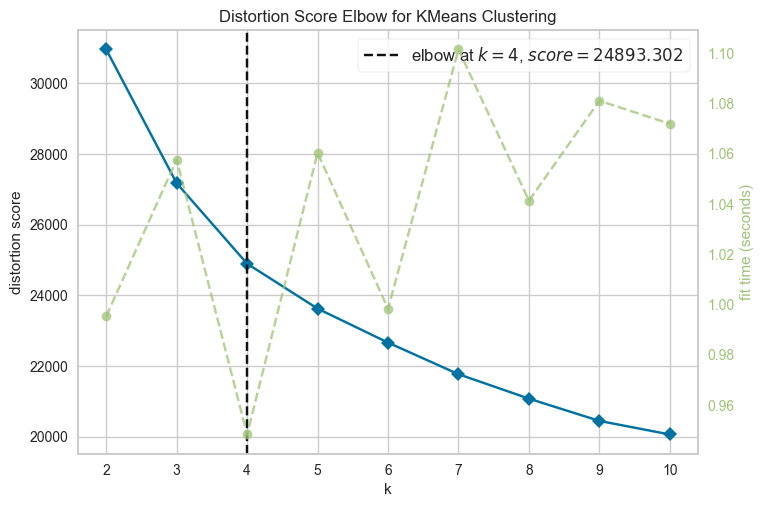

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

<details>

<summary>Curious why fit time can vary? <b>click me</b></summary>

The fit time for the k-means algorithm varies for different values of \( k \) (number of clusters) due to several factors:

1. **Number of Calculations**: As \( k \) increases, the number of centroid calculations and the distances that need to be computed between each data point and every centroid increase. Specifically, for each point, the algorithm must determine the nearest of the \( k \) centroids.

2. **Number of Iterations**: The number of iterations it takes for the algorithm to converge can change with different \( k \) values. Some cluster configurations may converge faster than others. Remember, k-means is an iterative algorithm that keeps adjusting the centroids until either they don't move much between iterations or a predefined number of iterations is reached.

3. **Initialization**: The initial positions of centroids can affect convergence speed. While methods like "k-means++" are designed to provide good initial positions for centroids, the interaction between initial positions and the value of \( k \) can still lead to variations in fit time.

4. **Local Minima**: K-means aims to minimize the within-cluster sum of squares, but it can get stuck in local minima. Depending on the initialization and the structure of the data, different \( k \) values can lead to different local minima, which can vary in terms of convergence time.

5. **Data Distribution**: The distribution and shape of clusters in the dataset can interact with the chosen \( k \) to make some values of \( k \) harder to fit than others. For instance, if there's a natural number of clusters in the data, setting \( k \) to this number might result in faster convergence than if \( k \) is set to a less natural number.

6. **Memory and Computation Constraints**: On a more practical note, depending on the available computational resources, handling larger \( k \) values might become increasingly resource-intensive, leading to longer fit times.

In summary, the complexity of the k-means algorithm is influenced by the number of clusters, data distribution, number of data points, and the dimensionality of the data. Different \( k \) values can result in varying computational requirements, leading to differences in fit times.

</details>

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [202]:
AC = AgglomerativeClustering(n_clusters=4, compute_distances=True)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC


To visualize the dendrogram after using Agglomerative Clustering, we will use the same helper function we defined in `Part 1`

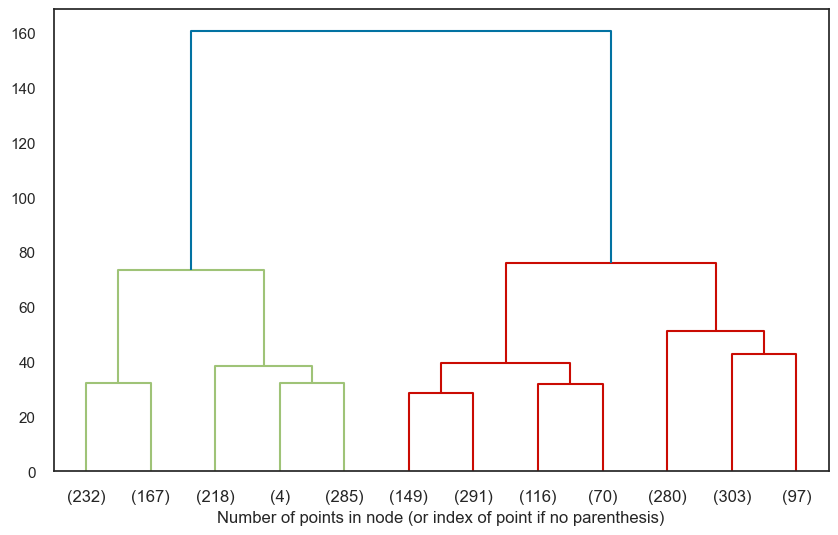

In [203]:
plt.figure(figsize=(10, 6))

plot_dendrogram(AC, truncate_mode='lastp', p=12)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")

plt.show()

- The truncate_mode=`lastp` and p=`12` arguments make sure that we're only showing the last 12 merged clusters in the dendrogram for a clearer view. You can adjust p as needed.

- The dendrogram will help you see how the clusters are formed and might provide insights into what a good number of clusters could be for your data.

- Once you know the number of clusters to look for  using a cut off point in a dendogram, you could use another algorithm with that number of prespecified clusters

In [67]:
# Specify the number of clusters and other parameters
n_clusters = 4
max_iter = 1000
algorithm = 'elkan'

# Create a KMeans instance
kmeans_4 = KMeans(n_clusters=n_clusters, 
                max_iter=max_iter, 
                random_state=random_state, 
                algorithm=algorithm)

# Fit the KMeans model to your data
yhat_KM_k4 = kmeans_4.fit_predict(PCA_ds)

# Assign cluster labels to your DataFrame
PCA_ds_k4 = PCA_ds
data_k4 = data
PCA_ds_k4["Cluster"] = yhat_KM_k4
data_k4["Cluster"] = yhat_KM_k4

#### **Feature Importance using Correlation Analysis**

Once you have your cluster labels, you can look at which features correlate most with the labels array (or een individual cluster IDs)


<br>

```python
def correlation_analysis(data, threshold = 0.33): # Adjust threshold as needed
    corr = data.corr()
    high_corr_features = corr['Cluster'][(corr['Cluster'] > threshold) | (corr['Cluster'] < -threshold)]
    print("Features with high correlation to 'Clusters':")
    return high_corr_features.sort_values()
```
<br>

- [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) returns (pearson) corelation of features in dataset .
- We use the cluster label column to find highly corelated features with the labels
- You can set a threshold according to needs


- This function is present in `clustering_intro_helpers.py`

In [204]:
correlation_analysis(data_k4)

Features with high correlation to 'Clusters':


Children              -0.723701
Family_Size           -0.597535
Kidhome               -0.514749
NumWebVisitsMonth     -0.514712
Teenhome              -0.488728
NumWebPurchases        0.368491
Clusters               0.455034
Gold                   0.455897
NumStorePurchases      0.573359
Fruits                 0.596971
Sweets                 0.597834
Income                 0.623207
Fish                   0.626799
Wines                  0.629123
NumCatalogPurchases    0.693351
Meat                   0.726143
Spent                  0.798746
Cluster                1.000000
Name: Cluster, dtype: float64

- We can also plot a heatmap. Look at the top row.
- Darker squares correspond to highly corelated features with the cluster labels


- This function is present in `clustering_intro_helpers.py`

In [69]:
correlation_plot(data_k4)

- Sometimes, it could be useful to visualize the PCA vectors in 3D. It also looks cool.


- You can modify this function to annotate each point with veature values from the original data, instead of the PCA coordinates as now.
- This can help with EDA
- This function is present in `clustering_intro_helpers.py`

In [70]:
plot_3d(PCA_ds_k4, ['PC1', 'PC2', 'PC3', 'Cluster'], title='The Plot of the Clusters')

- You also would like to know how many samples exist per cluster

In [71]:
bar_graph(data_k4)

- And how different variables are distributed between clusters
- A (set of) scatter plots will do the job!

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def scatter_plot(data, xyc, fig, row, col, show_legend=True):
    cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728'}

    data['Cluster Names'] = data[xyc[2]].apply(lambda x: f'cluster_{x}')
    
    # Check if x column is discrete integer and add jitter if true
    if is_discrete_integer(data[xyc[0]]):
        data[xyc[0]] = add_jitter(data[xyc[0]])
    
    # Check if y column is discrete integer and add jitter if true
    if is_discrete_integer(data[xyc[1]]):
        data[xyc[1]] = add_jitter(data[xyc[1]])

    for cluster, color in cluster_colors.items():
        subset = data[data[xyc[2]] == cluster]
        fig.add_trace(go.Scatter(x=subset[xyc[0]], y=subset[xyc[1]], 
                                 mode='markers', 
                                 marker=dict(color=color),
                                 name=f'cluster_{cluster}',
                                 legendgroup=f'cluster_{cluster}',
                                 showlegend=show_legend), 
                      row=row, col=col)
        
    fig.update_xaxes(title_text=xyc[0], row=row, col=col)
    fig.update_yaxes(title_text=xyc[1], row=row, col=col)

    return fig

#### Note: 
- Some variables are discrete, so plotting them in scatter plots will lead to overlapping points that are not intuitive to visualize.
- You can use the `add_jitter()` function (see `clustering_intro_helpers.py`) to add small uniform noise to these features, just for visualization

In [73]:


# Create subplot figure
fig = make_subplots(rows=3, cols=3)

# Add the two scatter plots
fig = scatter_plot(data_k4, ['Income', 'Spent', 'Cluster'], fig, 1, 1)
fig = scatter_plot(data_k4, ['Income', 'NumStorePurchases', 'Cluster'], fig, 1, 2,show_legend=False )
fig = scatter_plot(data_k4, ['Income', 'Age', 'Cluster'],  fig, 2, 1, show_legend=False)
fig = scatter_plot(data_k4, ['Income', 'NumWebPurchases', 'Cluster'],  fig, 2, 2, show_legend=False)
fig = scatter_plot(data_k4, ['Income', 'NumWebVisitsMonth', 'Cluster'],  fig, 3, 1, show_legend=False)
fig = scatter_plot(data_k4, ['Income', 'NumCatalogPurchases', 'Cluster'],  fig, 3, 2, show_legend=False)

fig = scatter_plot(data_k4, ['Income', 'Family_Size', 'Cluster'],  fig, 1, 3, show_legend=False)
fig = scatter_plot(data_k4, ['Income', 'Meat', 'Cluster'],  fig, 2, 3, show_legend=False)
fig = scatter_plot(data_k4, ['Income', 'Wines', 'Cluster'],  fig, 3, 3, show_legend=False)

fig.update_layout(width=1400, height=1500)
# Display the figure
fig.show()

### Cluster Interpretation

**Can we give human understandable labels to these clusters?**


#### Describing each cluster:

<details>

<summary>Interpreting clusters</summary>

- **Red cluster ("Affluent Gourmet Shoppers")**: These are individuals with a high income who spend generously. They come from various age groups but typically have smaller families. Their food preferences lean heavily towards meat, and they have a fondness for wine. Their primary shopping venues are physical stores and catalogues, with little to no engagement on the website.

- **Green cluster ("Web-savvy Traditionalists")**: This group possesses a moderate income and spends a tad more conservatively than the red cluster. They have relatively larger families and are older in age. Their affinity for meat is significant but not as intense as the red cluster, yet their appreciation for wine is on par. They predominantly make purchases online but aren't avid catalogue shoppers.

- **Blue cluster ("Frugal Web Buyers")**: These are mature individuals with mid-tier incomes but conservative spending habits. They boast a large family size. Their primary shopping platform is the web, although they rarely browse. Their purchase habits are eclectic but always within limits.

- **Orange cluster ("Young Digital Explorers")**: This cluster represents the younger, budget-conscious demographic. They're the most frequent website visitors and have a family size that ranges from small to medium. Their financial standing is modest, and their spending reflects this.

<dtails>

#### Basic Ideas for marketing campaign

<details>

<summary>Possible marketing campaigns</summary>

1. **Red cluster (Affluent Gourmet Shoppers)**:
    - **Campaign Name**: "Gourmet Delights"
    - **Description**: Offer premium meat and wine bundles at a slightly discounted rate. Since they primarily purchase in-store or via catalogue, send out premium, glossy catalogues showcasing the best gourmet offerings. Host exclusive in-store wine tasting events or gourmet cooking classes to engage this group further.
    
<br>

2. **Green cluster (Web-savvy Traditionalists)**:
    - **Campaign Name**: "Digital Deals & Traditional Tastes"
    - **Description**: Highlight meat and wine offers on the website's homepage. Since they have bigger families, consider bulk purchase deals or family packages. Offer incentives for web purchases, like exclusive online discounts or free shipping for a minimum purchase amount. Also, create digital catalogues or newsletters highlighting their favorite products.
    
<br>

3. **Blue cluster (Frugal Web Buyers)**:
    - **Campaign Name**: "Budget-Friendly Web Specials"
    - **Description**: Showcase a range of moderate-priced products on the website's main page. As they buy in moderation, offer "mix and match" deals where they can choose a combination of different products at a special price. Implement loyalty programs to encourage repeated purchases and provide discounts for referrals to attract more of their demographic.
    
<br>

4. **Orange cluster (Young Digital Explorers)**:
    - **Campaign Name**: "Youthful Digital Dive"
    - **Description**: Use vibrant and modern website designs to appeal to this younger audience. Offer limited-time online flash sales or exclusive website-only product launches. Implement a referral program, encouraging them to invite friends to the website in exchange for rewards or discounts. Engage them through interactive website features, such as quizzes that lead to personalized product recommendations. Consider partnerships with young influencers or content creators to promote the brand on social media platforms popular with this demographic.


</summary>

### Some Takebacks

<details>

<summary> Technical Takebacks</summary>

1. **Cluster Shapes and Densities:** Some clustering methods presuppose nearly spherical and uniformly-sized clusters, while others accommodate various shapes and densities.
 
2. **Data Preprocessing:** Distance metric relevance hinges on proper data scaling and normalization.

3. **Outlier Considerations:** Algorithms like DBSCAN identify outliers as noise, whereas methods like k-means can be skewed by them.

4. **Algorithm Interpretability:** Some clustering methods yield easily understood clusters, while others might output more intricate structures.

5. **Scalability Concerns:** Algorithms like k-means excel with large datasets, but others, such as hierarchical clustering, can become computationally taxing.

6. **Initialization Sensitivity:** Certain algorithms, like k-means, depend heavily on initial cluster placements, necessitating multiple runs to ensure optimal results.

7. **Metric Choices:** With ground truth labels, the right evaluation metric—silhouette score, Davies-Bouldin index, or adjusted Rand index—becomes pivotal.

8. **Linkage Methods in Hierarchical Clustering:** The selected linkage method in hierarchical clustering affects the dendrogram and clusters, requiring careful consideration.

9. **Cluster Stability:** Some methods provide insight into cluster stability, indicating the reliability of clustering results against data changes or initialization.

10. **Dimensionality Reduction:** Techniques like PCA can be instrumental for high-dimensional data to counteract the curse of dimensionality.

11. **Visualization Methods:** Utilizing visualization strategies like t-SNE or PCA can clarify and enhance clustering outcomes.

12. **Domain Knowledge Integration:** Incorporating expert knowledge can steer algorithm choice, feature selection, metric use, and cluster quantity decisions.

</details>

<details>
<summary>Business-level Takebacks</summary>

1. **Beyond Metrics**: The optimal cluster number isn't purely dictated by metrics like the silhouette score. Other factors, especially domain specifics, can inform this choice.

2. **Domain Knowledge**: Prior expertise might indicate a certain number of distinct data categories, guiding clustering decisions beyond metric outcomes.

3. **Clustering Goals**: The clustering objective might necessitate finer groupings. For instance, customer segmentation could benefit from a detailed split, even if broader categories show better metric outcomes.

4. **Interpretability Balance**: Too few clusters might overgeneralize data, while excessive clusters can over-complicate it. Finding the right balance is crucial.

5. **Visual Data Inspection**: Visualization tools can reveal clear data groupings, reinforcing or challenging metric-based decisions.

6. **Multiple Metrics**: Various metrics can be explored for evaluation, with some possibly favoring different cluster solutions.

7. **Application Considerations**: In fields like marketing, nuanced customer categories might be more actionable, even if broader categories show better metric scores.
</details>

In summary, both quantitative metrics and broader considerations, including domain expertise, visualization, and end-use application, play vital roles in refining clustering decisions.

# Part 3: Anomaly detection with DBSCAN




### What is [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)?



__DBSCAN__ is a clustering algorithm that stands for:

"**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise"

 - _Density-Based_ - DBSCAN will group points that are densely-packed together
 - _Spacial-Clustering_ - DBSCAN is for numerical points $\in \mathbb{R}^n$
 - _Applications with Noise_ - DBSCAN is great for applications that have noise
   - This is because DBSCAN also finds outliers/noise in data

<br>

#### How does DBSCAN work?
__DBSCAN__ uses two parameters:
 - `eps` (aka epsilon - $\epsilon$) - the max distance between two points for them to be considered "in the same neighborhood"
 - `min_samples` - the minimum number of neighbors a point needs to be considered a __core point__.

If a point is a neighbor of a __core point__, then it's in the same cluster as that point.

Otherwise, it's considered to be __noise__.


#### Additional Resources

You're encouraged to take a look at the [Pseudocode for DBSCAN](https://www.researchgate.net/figure/Pseudocode-of-the-DBSCAN-algorithm_fig2_325059373?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) if a more in-depth understanding is desired.

[The original DBSCAN paper ](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) hosted by [aaai.org](https://www.aaai.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).


### Use case: Outlier removal





#### Your doctor friend has bad handwriting

Imagine your friend has really messy handwriting, and you want to assist them in improving it. However, they'll only consider working on their handwriting if you can demonstrate that it's indeed messy.

One approach to accomplish this is by utilizing DBSCAN to group legible handwriting from other people. Here's the concept: if your friend struggles to write a specific character correctly, it will likely result in one of two scenarios:

1. DBSCAN will classify it as noise because it's significantly different from typical handwriting.
2. It will be grouped with a different type of character. For instance, if your friend writes a "5" that gets grouped with "4"s, it's a clear indication that their "5" isn't very well-written.

#### Pipeline

Our process will unfold as follows:

1. Load and standardize the handwriting data.
2. Apply the TSNE algorithm, which simplifies the data's dimensions so that similar data points are closer together.
3. Utilize the DBSCAN algorithm to categorize the data.
4. Visualize the categorized data to highlight the dissimilarities in your friend's handwriting and provide evidence of its poor quality.

### Load data

In [74]:


import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
sns.set_style('white')



- The data is 8 by 8 pixels of handwritten digits from your doctor friend. He has given you 3 such handwritten digits, flattened.

In [75]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv')
df.head()


0   1   2  3   4   5   6   7  8   9  ...  55  56  57  58  59  60  61  62  \
0  0   0   0  0  16  13  14  14  0   0  ...   0   0   0  11  15  14  14   0   
1  0  16  10  0   0   0   0   0  0   0  ...  14   0   0   0   0  -1   2  13   
2  0  12  14  6   5   3   0   0  0  16  ...   0   0  10  11   0   0   2  14   

   63  y  
0   0  0  
1   7  1  
2   8  2  

[3 rows x 65 columns]

We will need to reshape the data into 8x8 images, so matplotlib can properly display it:

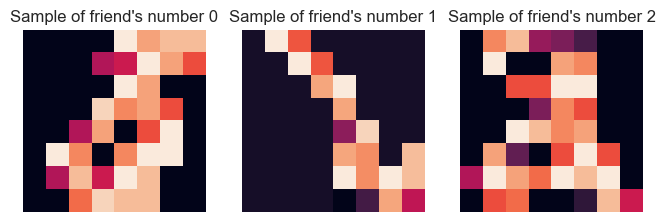

In [76]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy()
plt.rcParams['figure.figsize'] = (8,6)

it = (x.reshape(8, 8) for x in friend_digits)
c = 3

fig, ax = plt.subplots(1, c, sharex='col', sharey='row')

for j in range(c):
    ax[j].axis('off')
    ax[j].set_title(f'Sample of friend\'s number {j}')
    ax[j].imshow(next(it))

plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Next, we import the a dataset of digits from `sklearn` based on the MNIST dataset.
This data contains handwritten numbers from hundreds individuals across the United States:

In [77]:
from sklearn.datasets import load_digits

In [78]:
# Load the data
digits, y = load_digits(return_X_y=True)
pd.DataFrame(digits).head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

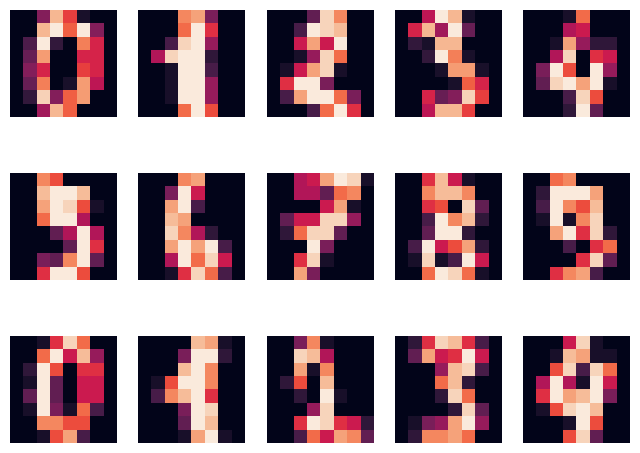

In [79]:
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in digits)
r, c = 3, 5
fig, ax = plt.subplots(r, c, sharex='col', sharey='row')
for i in range(r):
    for j in range(c):
        ax[i, j].axis('off')
        ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

### Apply TSNE for dimensionality reduction

Now we create the dataset for our pipeline, containing _both_ MNIST and our friend's digits:

In [80]:
# Use np.r_ to concatenate two rows:
data = np.r_[digits, friend_digits]

y = np.r_[y, df['y']]

Lets sets up a dimensionality reduction technique called t-Distributed Stochastic Neighbor Embedding (t-SNE) with specific configuration parameters:

- `n_components=2`: This parameter specifies the number of dimensions in the embedded space. In this case, it's set to 2, which means t-SNE will reduce the original data's dimensions to a 2D space. This is commonly done for visualization purposes, as it allows data to be plotted on a 2D scatterplot.

- `init="pca"`: The initialization method for t-SNE. It's set to "pca," which means it starts with an initial configuration of points in the embedded space that is determined by applying Principal Component Analysis (PCA) to the data. This initialization can help t-SNE converge faster and potentially reach a better solution.

- `n_iter=500`: This parameter controls the maximum number of iterations or optimization steps that t-SNE will perform while trying to find the best arrangement of data points in the embedded space. In this case, it's set to 500 iterations.

- `n_iter_without_progress=150`: If t-SNE does not make progress in reducing the cost function for a certain number of iterations, it might stop early to avoid excessive computation. This parameter specifies the number of iterations without progress that will trigger early stopping, and it's set to 150 iterations without progress.

- `perplexity=10`: Perplexity is a hyperparameter that controls the balance between preserving global and local structure in the data. A higher perplexity value will focus more on preserving global structure. In this case, it's set to 10, which is a typical value used in practice.

- `random_state=0`: This parameter sets the random seed for the random number generator. Setting a random seed ensures that the results of the t-SNE embedding are reproducible. If you use the same random seed (in this case, 0) in different runs, you should get the same results, which is useful for reproducibility and debugging.

In [81]:
embedding = TSNE(n_components=2,
        init="pca",
        n_iter=500,
        n_iter_without_progress=150,
        perplexity=10,
        random_state=0)

In [82]:
e_data = embedding.fit_transform(data)

Our data after applying `TSNE` algorithm:

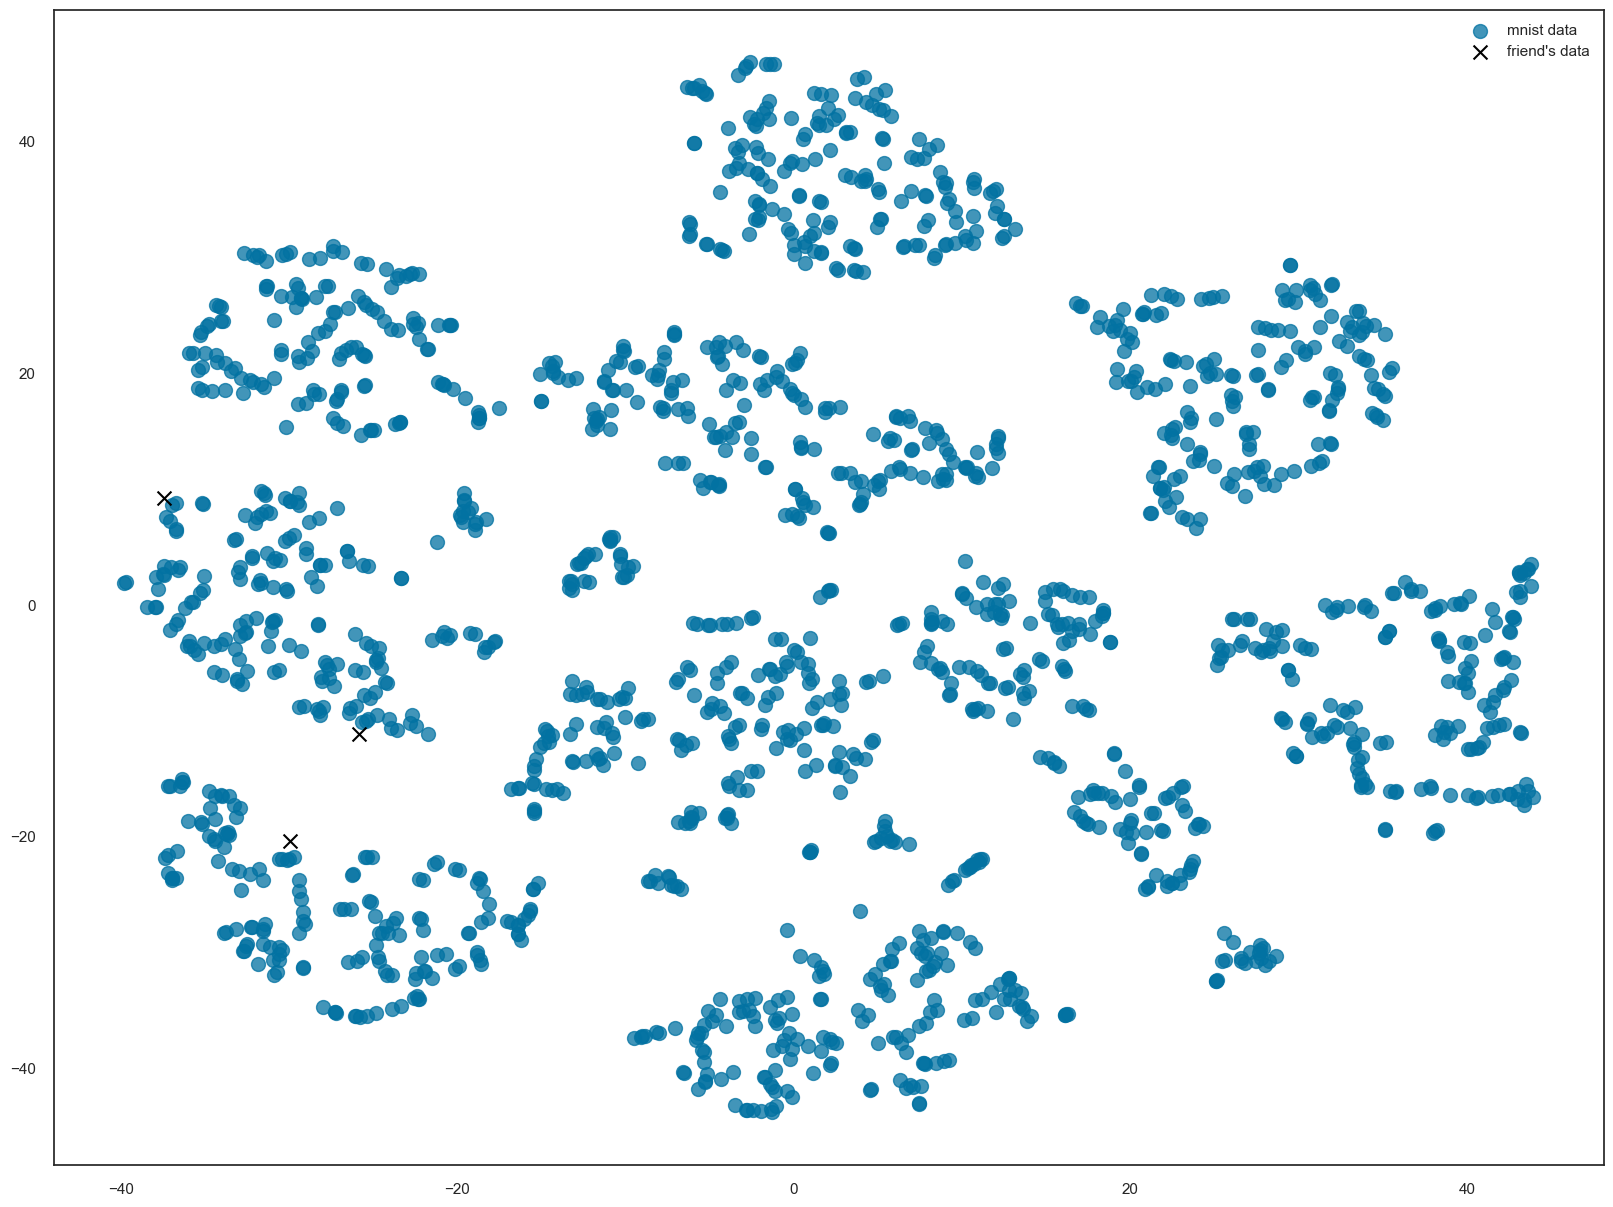

In [83]:
plt.rcParams['figure.figsize'] = (20,15)
n = friend_digits.shape[0]

# our clean reference 
plt.scatter(
    e_data[:-n, 0],
    e_data[:-n, 1],
    marker='o',
    alpha=0.75,
    label='mnist data',
    s=100)

# doctor's data
plt.scatter(
    e_data[-n:, 0],
    e_data[-n:, 1],
    marker='x',
    color='black',
    label='friend\'s data',
    alpha=1,
    s=100)

plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

### Use DBSCAN on reduced data

Next, we apply DBSCAN, using our chosen hyperparameters:

In [84]:
cluster = DBSCAN(eps=5, min_samples=20)
cluster.fit(e_data)

print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 10 clusters and 24 points of noise.


In [85]:

unique_labels = set(cluster.labels_)

n_labels = len(unique_labels)

cmap = plt.cm.get_cmap('brg', n_labels)


- Lets label these clusters in the 2D `tsne` data space

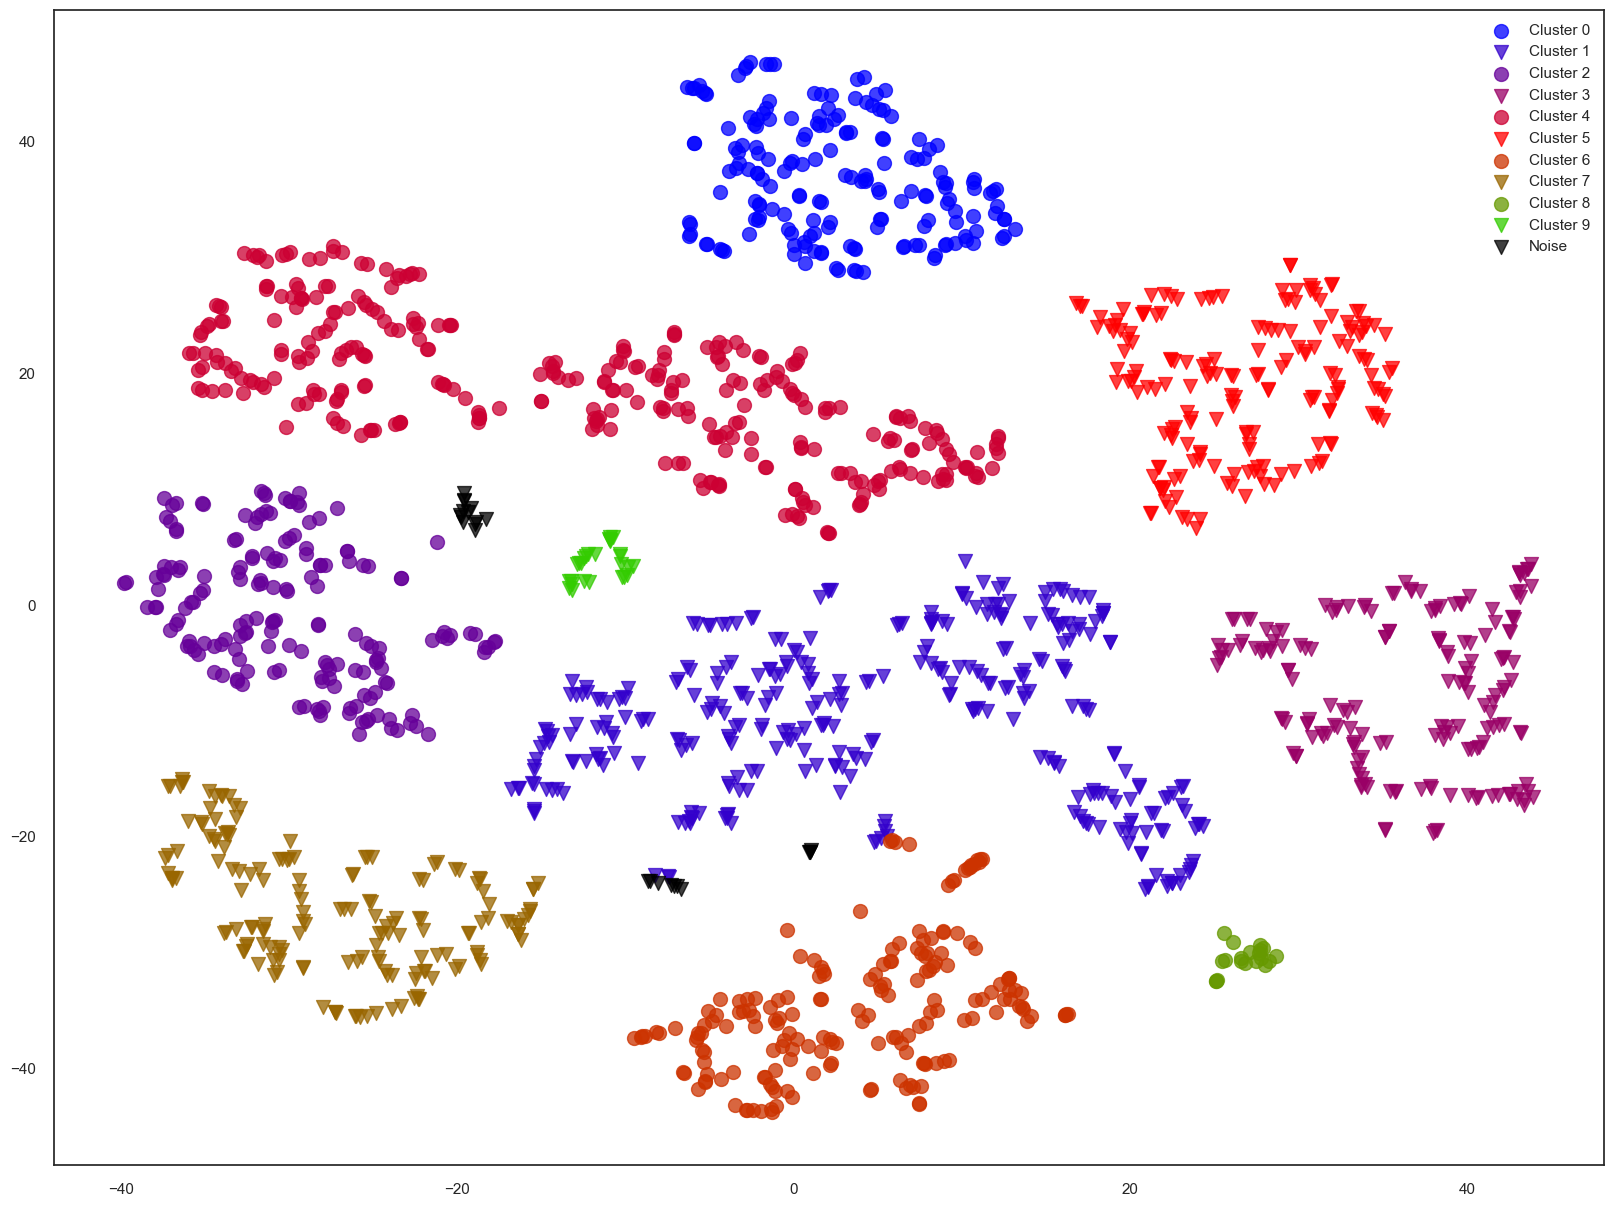

In [86]:
plt.rcParams['figure.figsize'] = (20,15)

for l in unique_labels:
    plt.scatter(
        e_data[cluster.labels_ == l, 0],    # first tsne dimension
        e_data[cluster.labels_ == l, 1],    # second tsne dimension
        c=[cmap(l) if l >= 0 else 'Black'], # set noise point to render in black
        marker='ov'[l%2],                   # custom marker for each point in a cluster
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
    
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [92]:
print("The predicted cluster labels of our friend's handwriting:")
print(cluster.labels_[-3:])

The predicted cluster labels of our friend's handwriting:
[2 7 2]


### Evaluate clusters

Let's see how our pipeline categorized some of the data in its original, handwritten form:

- Remember, the clustering algorithm just groups similar points together into a cluster with an arbitrary ID, theres no reason the IDs will correspond to the actual digit class

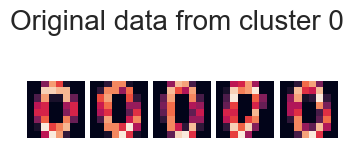

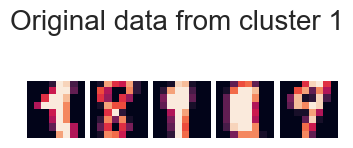

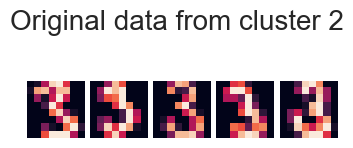

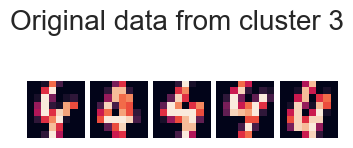

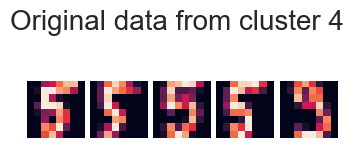

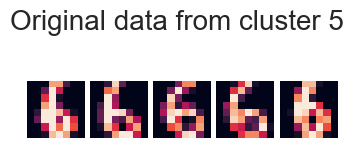

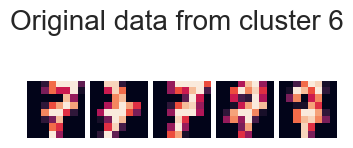

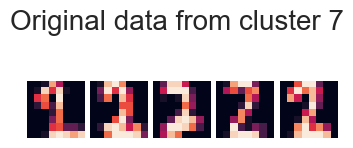

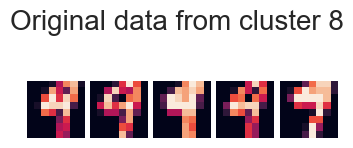

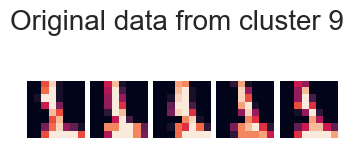

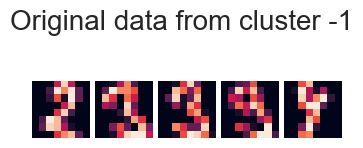

In [88]:
r, c = 1, 5
plt.rcParams['figure.figsize'] = (4*r,4*c)
for label in unique_labels:
    cluster_data = data[cluster.labels_ == label]
    nums = cluster_data[np.random.choice(len(cluster_data), r * c, replace=False)]
    it = (x.reshape(8, 8) for x in nums)
    fig, ax = plt.subplots(r, c)
    ax = ax.reshape(r, c)
    plt.subplots_adjust(wspace=0.1, hspace=-0.69)
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545)
    for i in range(r):
        for j in range(c):
            ax[i, j].axis('off')
            ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

- Because we actually do have the original labels, let's compare `DBSCAN`'s clusters to the actual labels:

Correct labels:


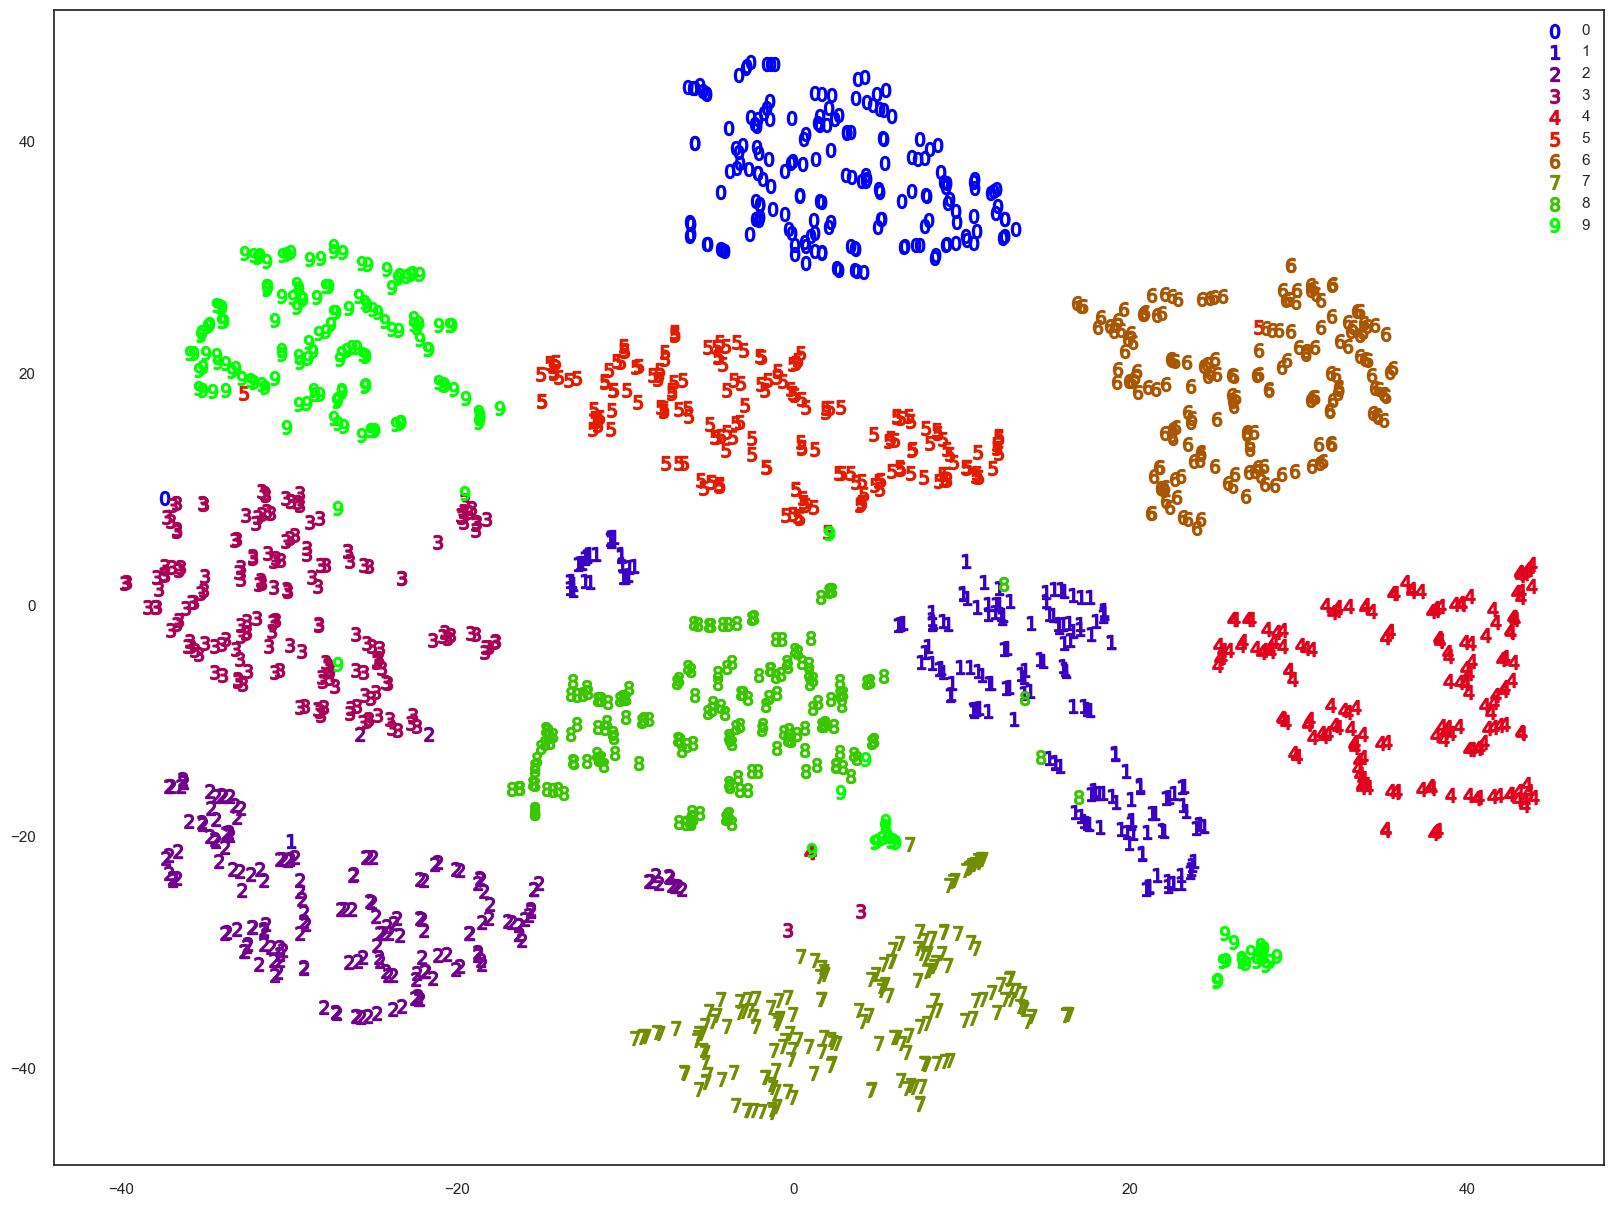

In [89]:
print('Correct labels:')
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(y)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)

for l in unique_labels:
    plt.scatter(
        e_data[y == l, 0],
        e_data[y == l, 1],
        c=[cmap(l)],
        marker=f'${l}$',   # render cluster with true label marker
        alpha=1,
        label=f'{l}',      # show correct true label as cluster ID
        s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

### Convince your friend to seek help

Finally, we can prove our friend's handwriting is unreadable (even for state-of-the-art unsupervised algorithms):

In [90]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])):
    print('-' * 30)
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}')
    if l == -1:
        print('(IE: Noise)')
    else:
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True)
        mfreq = v[np.argmax(c)]
        ratio = c.max() / c.sum()
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')
        
    print(f'Your friend\'s {i}th sample is supposed to be the number {t}')

------------------------------
Your friend's 0th sample was categorized as being in cluster #2
Cluster 2 is 97.13% the number 3
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #7
Cluster 7 is 99.40% the number 2
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #2
Cluster 2 is 97.13% the number 3
Your friend's 2th sample is supposed to be the number 2


As you can see, all our friend's data was either categorized as noise, or put in a category where the vast majority is a different number.

<details>

<summary>Hyperparameter tuning tips for DPSCAN</summary>
Choosing appropriate values for `eps` (epsilon) and `min_samples` in DBSCAN is crucial for its performance. Here are some strategies to determine the best values for these parameters:

1. **k-distance Graph**:
    - For each point, compute the distance to its k-th nearest neighbor, where `k` is roughly the expected cluster size.
    - Plot these distances in ascending order.
    - Look for an "elbow" in the plot. This "elbow" represents an area where the distance starts to increase rapidly and can be a good estimate for `eps`.
   
2. **Use Domain Knowledge**:
    - If you have some domain-specific knowledge or intuition about the dataset, it might give you a hint about how dense the clusters are and how far apart they are. This can guide the selection of `eps` and `min_samples`.

3. **Trial and Error**:
    - This is a more brute-force approach, but by trying a grid of possible values and evaluating the clustering performance (for example, using silhouette score, visual inspection, or domain-specific criteria), you can find suitable values. Remember, however, that silhouette scores might not always be the best for evaluating DBSCAN, especially if noise is present.

4. **min_samples Heuristic**:
    - A common heuristic for choosing `min_samples` is to set it to the dimensionality of your data plus one (i.e., `min_samples = D + 1`), especially if the dimensionality is not too high. However, this is just a heuristic, and other values might work better depending on the specific dataset.

5. **Visual Inspection**:
    - If your dataset is 2D or 3D, you can visualize it and overlay the clusters DBSCAN found. This can give you insights into whether the clusters make sense, if `eps` might be too large/small, or if there's too much/little noise.

6. **Effect of Parameters**:
    - As you change `eps`, you'll notice that the number of clusters can change significantly. A very small `eps` may result in most data points being classified as noise. Conversely, a very large `eps` might result in most data points being part of a single cluster.
    - Increasing `min_samples` generally makes the clustering more conservative, resulting in more data points being classified as noise.

Remember, the optimal values for `eps` and `min_samples` will be specific to each dataset. It's common to use a combination of the above strategies to determine the best values for your specific scenario.
</details>

### Bonus: Finding the right value for `eps`

To determine the appropriate values of eps and min_samples for DBSCAN to find meaningful clusters in `tsne` output, you can use the k-distance graph method mentioned earlier. This method primarily helps in determining the eps value.

Here's how you can apply the k-distance graph method to your data:

1. Calculate the k-distance for each point in `tsne` representation of the data.
2. Plot the k-distances in ascending order.
3. Look for an "elbow" in the plot to determine an appropriate value for eps.

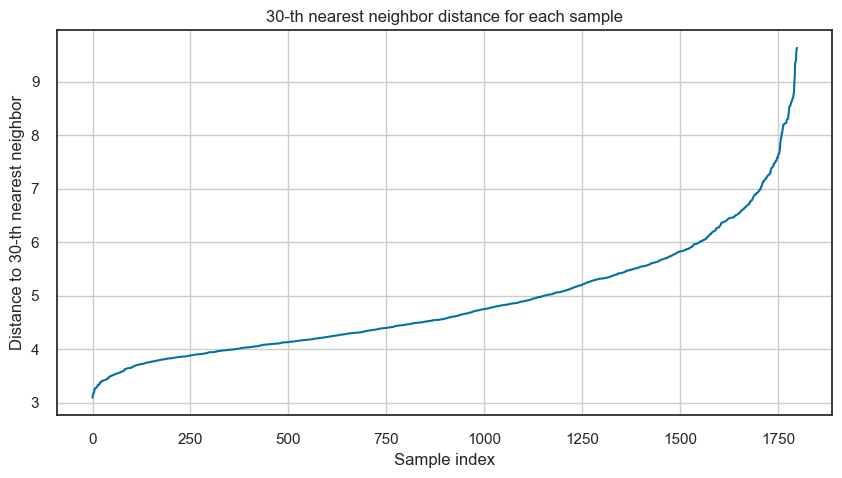

In [91]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Calculate the k-distances
k = 30  # This is just a heuristic; you can also try other values
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(e_data)
distances, indices = neighbors.kneighbors(e_data)

# Sort distance values by ascending order
distances = np.sort(distances, axis=0)
distances = distances[:, -1]

# Plot the k-distances
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel("Sample index")
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.title(f"{k}-th nearest neighbor distance for each sample")
plt.grid(True)
plt.show()

Examine the plot, and look for an "elbow" or a point where the distance starts increasing rapidly. The y-value at this elbow point can be a good estimate for eps. This plot shows a reasonable value for `eps` is around 5, which is exactly what we used!

Once you determine a potential value for eps, you can use it in the DBSCAN clustering. If the resulting clusters are not satisfactory, adjust the min_samples value or try another value of eps from the k-distance graph.

Remember, this is an iterative process and might require some tweaking until you get satisfactory results.

# You made it!

As a reward, heres a fun tool built with both supervised and unsupervised learning algorithms. Its called [Teachable Machine](https://teachablemachine.withgoogle.com/train/image)<br>  
**Idea:** 
1. Take a trained supervised learning model (i.e. A deep learning image recognition model trained on `n` classes)
2. Remove the classification layer so that the model provides a vector representation for each image. This is known as feature extraction.
3. Show this model new images it was never trained on and collect the vectors for these images
4. Perform clustering on these vectors.

Although the model has never seen these new data points, it has enough knowledge of the world to extract meaningful and distinguishable features from the inputs. While this approach will not automatically label the new unseen images, it will be able to tell you when they are different from each other!